In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date
import math
from math import sqrt, exp
from scipy.stats import norm
import requests_cache
# imports
!pip install requests_cache --upgrade
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import requests_cache

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from math import sqrt, exp
from scipy.stats import norm
from tqdm import tqdm

Requirement already up-to-date: requests_cache in /Users/dylan/opt/anaconda3/lib/python3.8/site-packages (0.8.1)


## The best stock that we are using is Fidelity Advisor® Semiconductors Fund (FELAX)

In [2]:
# Pull stock data from yahoo finance
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')
session.headers = {     'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',     'Accept': 'application/json;charset=utf-8'     }

def get_data_for_multiple_stocks(tickers,start_date='2018-12-31',end_date= '2020-12-31'):
    
    stocks = dict()
    stocks_log_returns = pd.DataFrame()
    stocks_adj_close= dict()
    # loop through all the tickers
    for ticker in tickers:
        
        # get the data for the specific ticker
        s = DataReader(ticker, 'yahoo', start_date, end_date, session = session)
      
        s.insert(0, "Ticker", ticker)  # insert ticker column
        
        s['Prev Adj Close'] = s['Adj Close'].shift(1)
        s['log_return'] = np.log(s['Adj Close']/s['Prev Adj Close'])
        stocks[ticker] = s
        stocks_log_returns[ticker] = s['log_return']
        stocks_adj_close[ticker] = s['Adj Close']
        
    return stocks, stocks_log_returns, stocks_adj_close


# Top 30 stocks in best portfolio
tickers = ['AAPL','TSLA', 'SQ', 'ROKU', 'NOW', 'CHGG', 'PYPL', 'SNAP'
    ,'OKTA', 'ZS', 'COUP', 'SHOP', 'TWTR', 'RNG', 'SE', 'NIO',
     'Z', 'PAYC', 'APPS', 'PCTY', 'TTD', 'TWLO', 'MRVL', 'QRVO']

num_shares = {'AAPL': 535180, 'TSLA': 95400, 'SQ': 256290, 'CRWD': 245970, 'ROKU': 137770, 'NOW': 82230, 'CHGG': 487820,
               'PYPL': 167650, 'SNAP': 762130, 'OKTA': 148880, 'ZS': 188790, 'COUP': 109030, 'SHOP': 32050, 'TWTR': 516880, 'RNG': 73330
             , 'SE': 122310, 'NIO': 484260, 'Z': 164670, 'PAYC': 42340, 'APPS': 317610
              , 'PCTY': 72960, 'TTD': 17930, 'TWLO': 40060, 'MRVL': 198500, 'QRVO': 56660}
stocks_data = get_data_for_multiple_stocks(tickers)[0]
stocks_log_returns = get_data_for_multiple_stocks(tickers)[1]
#print(stocks_data)
stocks_log_returns.head()

,AAPL,TSLA,SQ,ROKU,NOW,CHGG,PYPL,SNAP,OKTA,ZS,...,SE,NIO,Z,PAYC,APPS,PCTY,TTD,TWLO,MRVL,QRVO
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.001141,-0.070582,0.019596,0.059549,0.001515,0.002460,0.019548,0.049568,-0.008500,0.015186,...,-0.024141,-0.027050,-0.039727,-0.022714,0.032261,-0.011022,0.000861,-0.026438,0.018967,0.007383
2019-01-03,-0.104925,-0.031978,-0.087266,-0.077330,-0.052971,-0.005985,-0.043620,-0.019181,-0.060269,-0.012385,...,-0.030319,-0.024491,-0.014269,-0.027097,0.041457,-0.038341,-0.058496,-0.068032,-0.045251,-0.094918
2019-01-04,0.041803,0.056094,0.104253,0.113862,0.058061,0.053621,0.049666,0.046440,0.058529,0.060445,...,0.075440,0.049970,0.028988,0.038065,0.087434,0.057139,0.073534,0.086037,0.029368,0.064887
2019-01-07,-0.002228,0.052935,0.042731,0.223559,0.040672,0.023157,0.007621,0.042770,0.048224,0.041961,...,0.033180,0.021774,0.001622,0.025212,0.063084,0.009676,0.054861,0.090937,0.022528,0.006882


In [3]:
col_names = tickers 
col_names

['AAPL',
 'TSLA',
 'SQ',
 'ROKU',
 'NOW',
 'CHGG',
 'PYPL',
 'SNAP',
 'OKTA',
 'ZS',
 'COUP',
 'SHOP',
 'TWTR',
 'RNG',
 'SE',
 'NIO',
 'Z',
 'PAYC',
 'APPS',
 'PCTY',
 'TTD',
 'TWLO',
 'MRVL',
 'QRVO']

In [4]:
for index, row in stocks_log_returns.iterrows():
    
    for name in col_names:
        
        row[name] *= num_shares[name]
    

In [5]:
stocks_log_returns

,AAPL,TSLA,SQ,ROKU,NOW,CHGG,PYPL,SNAP,OKTA,ZS,...,SE,NIO,Z,PAYC,APPS,PCTY,TTD,TWLO,MRVL,QRVO
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,610.383675,-6733.559144,5022.352510,8204.062121,124.603389,1200.044577,3277.301960,37776.970453,-1265.478072,2867.036407,...,-2952.636858,-13099.325170,-6541.923528,-961.718017,10246.362597,-804.176303,15.442607,-1059.117353,3764.878100,418.294792
2019-01-03,-56153.553148,-3050.659171,-22365.338749,-10653.769851,-4355.824810,-2919.545345,-7312.880308,-14618.478395,-8972.842835,-2338.142249,...,-3708.349262,-11859.991185,-2349.737885,-1147.300277,13167.073848,-2797.368879,-1048.836720,-2725.378923,-8982.320273,-5378.053179
2019-01-04,22372.388401,5351.396634,26719.128323,15686.829884,4774.387290,26157.432381,8326.456688,35393.305761,8713.744234,11411.430797,...,9227.032030,24198.518096,4773.373198,1611.651796,27770.017305,4168.861950,1318.465312,3446.625294,5829.531113,3676.478961
2019-01-07,-1192.568481,5050.002550,10951.654822,30799.660990,3344.497112,11296.382288,1277.715375,32596.082578,7179.646064,7921.805886,...,4058.290183,10544.170004,267.110797,1067.496429,20036.082056,705.973706,983.664476,3642.952548,4471.721128,389.940134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,4111.571841,2303.869907,-2680.408113,-1370.898128,570.575779,-3524.070500,-561.080306,-23788.107892,1673.202127,-2012.605281,...,-1190.828166,-12944.969393,-3047.892809,-204.730429,9465.176823,-204.010036,150.338613,-44.132855,2718.624346,685.636653
2020-12-28,18806.782757,276.381776,-5607.031299,-6551.922186,-1520.840894,-3709.296907,-2056.910170,-29277.619813,-7108.655472,-5505.840632,...,-8452.986932,-18438.922076,-7235.679192,133.552455,-16354.061773,-739.189575,-2017.280202,-805.085257,-295.530870,-227.624926
2020-12-29,-7173.696079,330.032873,-10948.514686,-340.381636,338.058696,-17215.143777,-3376.386710,45516.128756,-567.703262,-1454.393919,...,5356.049750,22337.880861,-2652.386845,-1487.103856,-16219.169462,-1357.414324,-267.505559,-585.457757,-3194.486998,-916.298054


## Multiply stocks by weights here once we get the weights

In [6]:
stocks_log_returns = stocks_log_returns.assign(log_returns = lambda row: row.sum(axis = 1)).reset_index()
stocks_log_returns
#worst portfolio

,Date,AAPL,TSLA,SQ,ROKU,NOW,CHGG,PYPL,SNAP,OKTA,...,NIO,Z,PAYC,APPS,PCTY,TTD,TWLO,MRVL,QRVO,log_returns
0,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,2019-01-02,610.383675,-6733.559144,5022.352510,8204.062121,124.603389,1200.044577,3277.301960,37776.970453,-1265.478072,...,-13099.325170,-6541.923528,-961.718017,10246.362597,-804.176303,15.442607,-1059.117353,3764.878100,418.294792,39180.962285
2,2019-01-03,-56153.553148,-3050.659171,-22365.338749,-10653.769851,-4355.824810,-2919.545345,-7312.880308,-14618.478395,-8972.842835,...,-11859.991185,-2349.737885,-1147.300277,13167.073848,-2797.368879,-1048.836720,-2725.378923,-8982.320273,-5378.053179,-185400.092060
3,2019-01-04,22372.388401,5351.396634,26719.128323,15686.829884,4774.387290,26157.432381,8326.456688,35393.305761,8713.744234,...,24198.518096,4773.373198,1611.651796,27770.017305,4168.861950,1318.465312,3446.625294,5829.531113,3676.478961,298060.805148
4,2019-01-07,-1192.568481,5050.002550,10951.654822,30799.660990,3344.497112,11296.382288,1277.715375,32596.082578,7179.646064,...,10544.170004,267.110797,1067.496429,20036.082056,705.973706,983.664476,3642.952548,4471.721128,389.940134,188646.900267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2020-12-24,4111.571841,2303.869907,-2680.408113,-1370.898128,570.575779,-3524.070500,-561.080306,-23788.107892,1673.202127,...,-12944.969393,-3047.892809,-204.730429,9465.176823,-204.010036,150.338613,-44.132855,2718.624346,685.636653,-30403.661737
502,2020-12-28,18806.782757,276.381776,-5607.031299,-6551.922186,-1520.840894,-3709.296907,-2056.910170,-29277.619813,-7108.655472,...,-18438.922076,-7235.679192,133.552455,-16354.061773,-739.189575,-2017.280202,-805.085257,-295.530870,-227.624926,-100755.503587
503,2020-12-29,-7173.696079,330.032873,-10948.514686,-340.381636,338.058696,-17215.143777,-3376.386710,45516.128756,-567.703262,...,22337.880861,-2652.386845,-1487.103856,-16219.169462,-1357.414324,-267.505559,-585.457757,-3194.486998,-916.298054,4760.254345
504,2020-12-30,-4582.904910,4037.390020,8295.501230,-337.165933,210.587678,11113.303128,347.953966,-28494.176572,-701.263247,...,22956.968902,-138.797762,30.260437,23108.054412,-552.239506,-50.124286,-107.580838,5379.500248,1232.007720,50779.064182


## Historical Simulation VaR, Best Stock

In [7]:
from copy import deepcopy
df = deepcopy(stocks_log_returns)

for i in range(0, len(df)):
    past_250 = df.loc[(i-249):(i), 'log_returns']
    past_250.dropna(inplace=True)
    
    if len(past_250) == 250:
        #print(past_250)
        df.loc[i, 'VaR_95'] = past_250.quantile(0.05)       
    else:
        df.loc[i, 'VaR_95'] = np.NaN

In [8]:
df

,Date,AAPL,TSLA,SQ,ROKU,NOW,CHGG,PYPL,SNAP,OKTA,...,Z,PAYC,APPS,PCTY,TTD,TWLO,MRVL,QRVO,log_returns,VaR_95
0,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,2019-01-02,610.383675,-6733.559144,5022.352510,8204.062121,124.603389,1200.044577,3277.301960,37776.970453,-1265.478072,...,-6541.923528,-961.718017,10246.362597,-804.176303,15.442607,-1059.117353,3764.878100,418.294792,39180.962285,NaN
2,2019-01-03,-56153.553148,-3050.659171,-22365.338749,-10653.769851,-4355.824810,-2919.545345,-7312.880308,-14618.478395,-8972.842835,...,-2349.737885,-1147.300277,13167.073848,-2797.368879,-1048.836720,-2725.378923,-8982.320273,-5378.053179,-185400.092060,NaN
3,2019-01-04,22372.388401,5351.396634,26719.128323,15686.829884,4774.387290,26157.432381,8326.456688,35393.305761,8713.744234,...,4773.373198,1611.651796,27770.017305,4168.861950,1318.465312,3446.625294,5829.531113,3676.478961,298060.805148,NaN
4,2019-01-07,-1192.568481,5050.002550,10951.654822,30799.660990,3344.497112,11296.382288,1277.715375,32596.082578,7179.646064,...,267.110797,1067.496429,20036.082056,705.973706,983.664476,3642.952548,4471.721128,389.940134,188646.900267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2020-12-24,4111.571841,2303.869907,-2680.408113,-1370.898128,570.575779,-3524.070500,-561.080306,-23788.107892,1673.202127,...,-3047.892809,-204.730429,9465.176823,-204.010036,150.338613,-44.132855,2718.624346,685.636653,-30403.661737,-217608.959477
502,2020-12-28,18806.782757,276.381776,-5607.031299,-6551.922186,-1520.840894,-3709.296907,-2056.910170,-29277.619813,-7108.655472,...,-7235.679192,133.552455,-16354.061773,-739.189575,-2017.280202,-805.085257,-295.530870,-227.624926,-100755.503587,-217608.959477
503,2020-12-29,-7173.696079,330.032873,-10948.514686,-340.381636,338.058696,-17215.143777,-3376.386710,45516.128756,-567.703262,...,-2652.386845,-1487.103856,-16219.169462,-1357.414324,-267.505559,-585.457757,-3194.486998,-916.298054,4760.254345,-217608.959477
504,2020-12-30,-4582.904910,4037.390020,8295.501230,-337.165933,210.587678,11113.303128,347.953966,-28494.176572,-701.263247,...,-138.797762,30.260437,23108.054412,-552.239506,-50.124286,-107.580838,5379.500248,1232.007720,50779.064182,-217608.959477


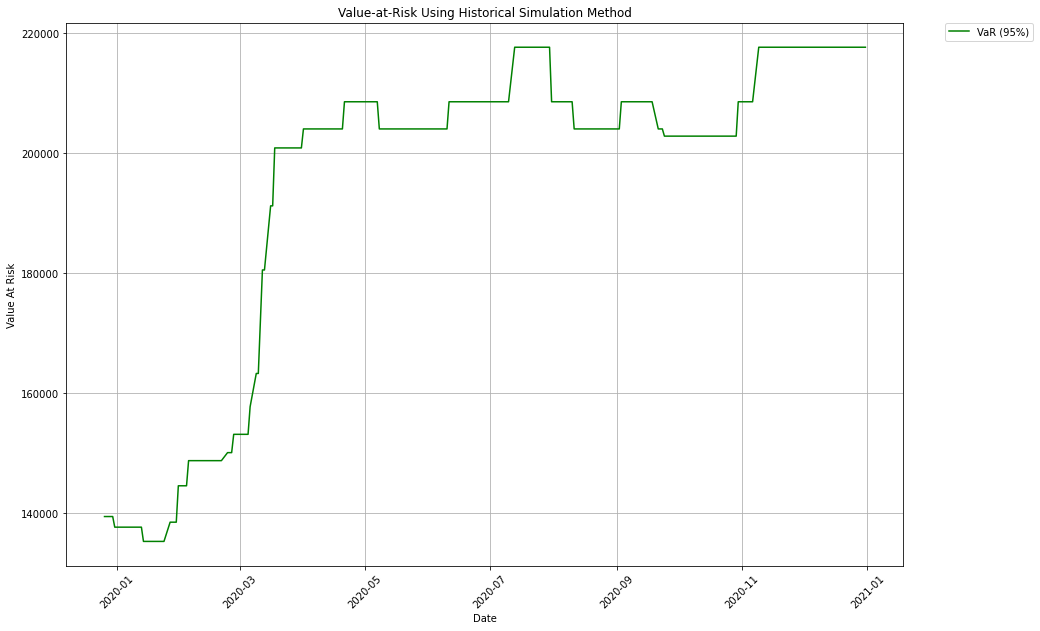

In [9]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'], -df['VaR_95'], 'g-', label='VaR (95%)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk Using Historical Simulation Method')
plt.show()

In [10]:
#create a list of all the stocks returns of each stock in the portfolio

all_returns = []

for item in stocks_data:
    stock_return = {}
    stock_return[item] = stocks_data[item]['Adj Close']#* num_shares[item]
    all_returns.append(stock_return)

all_returns 

[{'AAPL': Date
  2018-12-31     38.338482
  2019-01-02     38.382233
  2019-01-03     34.559071
  2019-01-04     36.034382
  2019-01-07     35.954174
                   ...    
  2020-12-24    131.352829
  2020-12-28    136.050766
  2020-12-29    134.239273
  2020-12-30    133.094650
  2020-12-31    132.069473
  Name: Adj Close, Length: 506, dtype: float64},
 {'TSLA': Date
  2018-12-31     66.559998
  2019-01-02     62.023998
  2019-01-03     60.071999
  2019-01-04     63.537998
  2019-01-07     66.991997
                   ...    
  2020-12-24    661.770020
  2020-12-28    663.690002
  2020-12-29    665.989990
  2020-12-30    694.780029
  2020-12-31    705.669983
  Name: Adj Close, Length: 506, dtype: float64},
 {'SQ': Date
  2018-12-31     56.090000
  2019-01-02     57.200001
  2019-01-03     52.419998
  2019-01-04     58.180000
  2019-01-07     60.720001
                   ...    
  2020-12-24    228.279999
  2020-12-28    223.339996
  2020-12-29    214.000000
  2020-12-30    221.03

In [11]:
#all_returns is a dictionary. we will make a dataframe for all the log returns for each day for each stock
returns_df = pd.DataFrame(all_returns[0])

for i in range(1,len(all_returns)):
    new_df = pd.DataFrame(all_returns[i])
    returns_df = pd.concat([new_df,returns_df],axis = 1)
    
cols = returns_df.columns
    

In [12]:
#work with returns_df from now on. note that when we find the weights here, we need to 
#multiply each stock by the weight (the number of stocks bought)

for column in returns_df.columns:
    returns_df[f'{column}_prev_return'] = returns_df[column].shift(1)

returns_df

,QRVO,MRVL,TWLO,TTD,PCTY,APPS,PAYC,Z,NIO,SE,...,ZS_prev_return,OKTA_prev_return,SNAP_prev_return,PYPL_prev_return,CHGG_prev_return,NOW_prev_return,ROKU_prev_return,SQ_prev_return,TSLA_prev_return,AAPL_prev_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,60.730000,15.876916,89.300003,11.606000,60.209999,1.830000,122.449997,31.580000,6.370000,11.320000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,61.180000,16.180922,86.970001,11.616000,59.549999,1.890000,119.699997,30.350000,6.200000,11.050000,...,39.209999,63.799999,5.510000,84.089996,28.420000,178.050003,30.639999,56.090000,66.559998,38.338482
2019-01-03,55.639999,15.465038,81.250000,10.956000,57.310001,1.970000,116.500000,29.920000,6.050000,10.720000,...,39.810001,63.259998,5.790000,85.750000,28.490000,178.320007,32.520000,57.200001,62.023998,38.382233
2019-01-04,59.369999,15.925949,88.550003,11.792000,60.680000,2.150000,121.019997,30.799999,6.360000,11.560000,...,39.320000,59.560001,5.680000,82.089996,28.320000,169.119995,30.100000,52.419998,60.071999,34.559071
2019-01-07,59.779999,16.288794,96.980003,12.457000,61.270000,2.290000,124.110001,30.850000,6.500000,11.950000,...,41.770000,63.150002,5.950000,86.269997,29.879999,179.229996,33.730000,58.180000,63.537998,36.034382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,167.110001,46.944195,362.880005,93.177002,214.279999,58.580002,462.130005,138.639999,45.770000,193.179993,...,207.470001,272.519989,51.740002,239.440002,93.080002,550.059998,360.559998,230.679993,645.979980,130.347565
2020-12-28,166.440002,46.874355,355.660004,83.262001,212.119995,55.639999,463.589996,132.679993,44.060001,180.279999,...,205.270004,275.600006,50.150002,238.639999,92.410004,553.890015,356.989990,228.279999,661.770020,131.352829
2020-12-29,163.770004,46.126038,350.500000,82.028999,208.210007,52.869999,447.589996,130.559998,46.139999,188.350006,...,199.369995,262.750000,48.259998,235.729996,91.709999,543.739990,340.410004,223.339996,663.690002,136.050766


In [13]:
returns_df

,QRVO,MRVL,TWLO,TTD,PCTY,APPS,PAYC,Z,NIO,SE,...,ZS_prev_return,OKTA_prev_return,SNAP_prev_return,PYPL_prev_return,CHGG_prev_return,NOW_prev_return,ROKU_prev_return,SQ_prev_return,TSLA_prev_return,AAPL_prev_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,60.730000,15.876916,89.300003,11.606000,60.209999,1.830000,122.449997,31.580000,6.370000,11.320000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,61.180000,16.180922,86.970001,11.616000,59.549999,1.890000,119.699997,30.350000,6.200000,11.050000,...,39.209999,63.799999,5.510000,84.089996,28.420000,178.050003,30.639999,56.090000,66.559998,38.338482
2019-01-03,55.639999,15.465038,81.250000,10.956000,57.310001,1.970000,116.500000,29.920000,6.050000,10.720000,...,39.810001,63.259998,5.790000,85.750000,28.490000,178.320007,32.520000,57.200001,62.023998,38.382233
2019-01-04,59.369999,15.925949,88.550003,11.792000,60.680000,2.150000,121.019997,30.799999,6.360000,11.560000,...,39.320000,59.560001,5.680000,82.089996,28.320000,169.119995,30.100000,52.419998,60.071999,34.559071
2019-01-07,59.779999,16.288794,96.980003,12.457000,61.270000,2.290000,124.110001,30.850000,6.500000,11.950000,...,41.770000,63.150002,5.950000,86.269997,29.879999,179.229996,33.730000,58.180000,63.537998,36.034382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,167.110001,46.944195,362.880005,93.177002,214.279999,58.580002,462.130005,138.639999,45.770000,193.179993,...,207.470001,272.519989,51.740002,239.440002,93.080002,550.059998,360.559998,230.679993,645.979980,130.347565
2020-12-28,166.440002,46.874355,355.660004,83.262001,212.119995,55.639999,463.589996,132.679993,44.060001,180.279999,...,205.270004,275.600006,50.150002,238.639999,92.410004,553.890015,356.989990,228.279999,661.770020,131.352829
2020-12-29,163.770004,46.126038,350.500000,82.028999,208.210007,52.869999,447.589996,130.559998,46.139999,188.350006,...,199.369995,262.750000,48.259998,235.729996,91.709999,543.739990,340.410004,223.339996,663.690002,136.050766


In [14]:
index = returns_df.index
index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=506, freq=None)

In [15]:
column_names = df.columns.drop(['log_returns','VaR_95','Date'])

## Daily calculation of log returns for each stock

In [16]:

log_returns_list = {}

for index, row in returns_df.iterrows():
    #for every column name, we find the log return for that stock for that day
    for item in column_names:
        current = item
        prev = item + "_prev_return"
        
        log_return = np.log(row[current]/row[prev])
        
        #if stock already added to log returns list
        namestr = f"{item}_log_return"
        if namestr in log_returns_list:
            log_returns_list[namestr].append(log_return)
        else: 
            log_returns_list[namestr] = []
            log_returns_list[namestr].append(log_return)
        
#log_returns_list here is a dictionary {stock:[nan, log return day 1, log return day 2 ...]}


## Calculate the weights for each stock every day

In [17]:
#here, we need to multiply the weights in once we get the optimisation, once again
stock_weights_daily = {}

for index, row in returns_df.iterrows():
    daily_total = 0
    daily_stocks = {}
    #for every column name, we find the return for that stock for that day.
    #we then add that value to the daily total.
    for item in column_names:
        current = item
        
        daily_return = row[current]
        daily_total += daily_return
        
        #if stock already added to returns list
        daily_stocks[item] = daily_return
    
    #after processing all of the stock returns for each row, we can calculated weighted returns
    
    for item in column_names:
        daily_stocks[item] = daily_stocks[item]/daily_total
    #we then add everything into a consolidated dictionary which holds the stock weights for all days
        namestr = f"{item}_weight"
        if namestr in stock_weights_daily:
            stock_weights_daily[namestr].append(daily_stocks[item])
        else:
            stock_weights_daily[namestr] = [] 
            stock_weights_daily[namestr].append(daily_stocks[item])
        

    
    

In [18]:
weight_df = pd.DataFrame(stock_weights_daily)
returns_df = pd.DataFrame(log_returns_list)

In [19]:
portfolio = pd.concat([weight_df, returns_df], axis = 1)
portfolio.shape

(506, 48)

## We now create a list of log returns for every day.

In [20]:
column_names

Index(['AAPL', 'TSLA', 'SQ', 'ROKU', 'NOW', 'CHGG', 'PYPL', 'SNAP', 'OKTA',
       'ZS', 'COUP', 'SHOP', 'TWTR', 'RNG', 'SE', 'NIO', 'Z', 'PAYC', 'APPS',
       'PCTY', 'TTD', 'TWLO', 'MRVL', 'QRVO'],
      dtype='object')

In [21]:
todate_logreturns = {}

for item in column_names:
    namestr = f"{item}_todate_lgr"
    todate_logreturns[namestr] = []
    

In [22]:
for i in tqdm(range(len(portfolio))):
    if i < 252:
        for item in column_names:
            namestr = f"{item}_todate_lgr"
            todate_logreturns[namestr].append(np.nan)
        
    else:
    #get the index j of the item 250 days before
        temp_dict = {}
        j = i-250
        #for the past 250 days
        for index in range(j,i):
            #for each stock
            for item in column_names:
                stock_return = f"{item}_log_return"
                if item in temp_dict:
                    temp_dict[item].append(portfolio.iloc[index][stock_return])
                else:
                    temp_dict[item] = []
                    temp_dict[item].append(portfolio.iloc[index][stock_return])
                    
                
        for item in temp_dict:

            todate_logreturns[f"{item}_todate_lgr"].append(temp_dict[item])
                    
        #print(len(temp_dict['NVDA']))
           
'''
            for item in column_names:
                colname = f"{item}_todate_lgr"
                print(temp_dict)
                todate_logreturns[colname].append(temp_dict[item])

'''

        
#todate_logreturns
        

100%|██████████| 506/506 [02:48<00:00,  3.01it/s] 


'\n            for item in column_names:\n                colname = f"{item}_todate_lgr"\n                print(temp_dict)\n                todate_logreturns[colname].append(temp_dict[item])\n\n'

In [23]:
lgreturns = pd.DataFrame(todate_logreturns)

In [24]:
portfolio = pd.concat([portfolio, lgreturns], axis = 1)
portfolio['Date'] = returns_df.index
portfolio['Date']

0        0
1        1
2        2
3        3
4        4
      ... 
501    501
502    502
503    503
504    504
505    505
Name: Date, Length: 506, dtype: int64

In [25]:
#each entry in cov_matrices will be a 30x30 matrix of covariance of the stocks for past 250 days
cov_matrices = []

#contains the weight of each stock for that particular day
weight_matrices = []

#average log returns for each stock.
log_returns = []

for index,row in portfolio.iterrows():
    mat_df = []
    weight_mat = []
    mean_returns = []
    
    #calculating covariance matrix
    for item in column_names:
        colname = f"{item}_todate_lgr"
        lgr = row[colname]
        mat_df.append(lgr)
        
        weight = f"{item}_weight"
        weight_mat.append(row[weight])
        
        mean_returns.append(np.mean(row[colname]))
        
    covariance = (np.exp(np.cov(mat_df))-1)
    cov_matrices.append(covariance)
    weight_matrices.append(weight_mat)
    log_returns.append(mean_returns)

In [26]:
portfolio['covariance_matrix'] = cov_matrices
portfolio['weight_matrix'] = weight_matrices
portfolio['log_returns'] = log_returns
portfolio[['covariance_matrix','weight_matrix','log_returns']]
portfolio

,AAPL_weight,TSLA_weight,SQ_weight,ROKU_weight,NOW_weight,CHGG_weight,PYPL_weight,SNAP_weight,OKTA_weight,ZS_weight,...,APPS_todate_lgr,PCTY_todate_lgr,TTD_todate_lgr,TWLO_todate_lgr,MRVL_todate_lgr,QRVO_todate_lgr,Date,covariance_matrix,weight_matrix,log_returns
0,0.029166,0.050636,0.042671,0.023310,0.135454,0.021621,0.063972,0.004192,0.048537,0.029829,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.029166463545834517, 0.050636322724291104, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.029387,0.047488,0.043795,0.024899,0.136529,0.021813,0.065654,0.004433,0.048435,0.030480,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"[0.029387055672048436, 0.04748818823919402, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.027826,0.048368,0.042207,0.024235,0.136169,0.022802,0.066096,0.004573,0.047956,0.031659,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,"[0.027825739908344912, 0.04836784613453155, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.027327,0.048185,0.044122,0.025580,0.135921,0.022660,0.065424,0.004512,0.047891,0.031677,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,"[0.02732712985225312, 0.048184845622821805, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.026129,0.048685,0.044127,0.030653,0.135658,0.022223,0.063174,0.004513,0.048160,0.031656,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,"[0.026128879924115014, 0.048684913115246614, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.019866,0.100089,0.034526,0.053993,0.083773,0.013977,0.036093,0.007585,0.041683,0.031046,...,"[-0.05414227940035539, 0.01697351677956466, 0....","[-0.018075281619697386, 0.01081813888701072, 0...","[-0.07480589510527354, 0.0275530125138568, 0.0...","[-0.026638638757577753, 0.004998203545950276, ...","[-0.01054621635070744, 0.005663556061175446, 0...","[-0.005406554820029962, 0.00017212418086562495...",501,"[[0.0008691795135262748, 0.0008263745524936805...","[0.01986647283525373, 0.10008947822703937, 0.0...","[0.002402377184232215, 0.008062151712878543, 0..."
502,0.021200,0.103417,0.034801,0.053043,0.084727,0.014290,0.036732,0.007520,0.040942,0.031066,...,"[0.01697351677956466, 0.02493201545716695, 0.0...","[0.01081813888701072, 0.04815145904278159, -0....","[0.0275530125138568, 0.043942833566280946, 0.0...","[0.004998203545950276, 0.048363719077764586, 0...","[0.005663556061175446, 0.030406497528730387, -...","[0.00017212418086562495, -0.002325719379178024...",502,"[[0.00086924186036752, 0.0008273525390389835, ...","[0.02119967572939628, 0.10341737317016635, 0.0...","[0.002409436838753365, 0.008307202435215825, 0..."
503,0.020984,0.104106,0.033452,0.053081,0.085346,0.013839,0.036114,0.008008,0.040916,0.030926,...,"[0.02493201545716695, 0.005457034315593548, 0....","[0.04815145904278159, -0.008793882170792718, 0...","[0.043942833566280946, 0.0016931514131354312, ...","[0.048363719077764586, 0.0035805440146391273, ...","[0.030406497528730387, -0.026273471305480266, ...","[-0.002325719379178024, -0.03171534165241456, ...",503,"[[0.0008734404255037465, 0.0008266353979502483...","[0.02098388897395472, 0.10410559959917039, 0.0...","[0.0025208818241072148, 0.008283929959948172, ..."
504,0.020641,0.107750,0.034280,0.052533,0.084890,0.014046,0.035904,0.007653,0.040403,0.031220,...,"[0.005457034315593548, 0.004073353869696094, 0...","[-0.008793882170792718, 0.024679022397737768, ...","[0.0016931514131354312, 0.021826204817089776, ...","[0.0035805440146391273, 0.03735387845625661, 0...","[-0.026273471305480266, -0.03782690204142346, ...","[-0.03171534165241456, -0.006250551304859677, ...",504,"[[0.0008728248945220063, 0.0008253323209392871...","[0.020640980755632986, 0.10774994475869741, 0....","[0.0023770243632027428, 0.008185291413455427, ..."


In [27]:
#we can finally compute wCw as the variance of portfolio
portfolio['variance']=portfolio.apply(lambda x: np.dot(np.dot(x['weight_matrix'],x['covariance_matrix']),x['weight_matrix']),axis = 1)
portfolio['variance'] = np.log(portfolio['variance']+1)
portfolio

,AAPL_weight,TSLA_weight,SQ_weight,ROKU_weight,NOW_weight,CHGG_weight,PYPL_weight,SNAP_weight,OKTA_weight,ZS_weight,...,PCTY_todate_lgr,TTD_todate_lgr,TWLO_todate_lgr,MRVL_todate_lgr,QRVO_todate_lgr,Date,covariance_matrix,weight_matrix,log_returns,variance
0,0.029166,0.050636,0.042671,0.023310,0.135454,0.021621,0.063972,0.004192,0.048537,0.029829,...,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.029166463545834517, 0.050636322724291104, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
1,0.029387,0.047488,0.043795,0.024899,0.136529,0.021813,0.065654,0.004433,0.048435,0.030480,...,NaN,NaN,NaN,NaN,NaN,1,NaN,"[0.029387055672048436, 0.04748818823919402, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
2,0.027826,0.048368,0.042207,0.024235,0.136169,0.022802,0.066096,0.004573,0.047956,0.031659,...,NaN,NaN,NaN,NaN,NaN,2,NaN,"[0.027825739908344912, 0.04836784613453155, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
3,0.027327,0.048185,0.044122,0.025580,0.135921,0.022660,0.065424,0.004512,0.047891,0.031677,...,NaN,NaN,NaN,NaN,NaN,3,NaN,"[0.02732712985225312, 0.048184845622821805, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
4,0.026129,0.048685,0.044127,0.030653,0.135658,0.022223,0.063174,0.004513,0.048160,0.031656,...,NaN,NaN,NaN,NaN,NaN,4,NaN,"[0.026128879924115014, 0.048684913115246614, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.019866,0.100089,0.034526,0.053993,0.083773,0.013977,0.036093,0.007585,0.041683,0.031046,...,"[-0.018075281619697386, 0.01081813888701072, 0...","[-0.07480589510527354, 0.0275530125138568, 0.0...","[-0.026638638757577753, 0.004998203545950276, ...","[-0.01054621635070744, 0.005663556061175446, 0...","[-0.005406554820029962, 0.00017212418086562495...",501,"[[0.0008691795135262748, 0.0008263745524936805...","[0.01986647283525373, 0.10008947822703937, 0.0...","[0.002402377184232215, 0.008062151712878543, 0...",0.000948
502,0.021200,0.103417,0.034801,0.053043,0.084727,0.014290,0.036732,0.007520,0.040942,0.031066,...,"[0.01081813888701072, 0.04815145904278159, -0....","[0.0275530125138568, 0.043942833566280946, 0.0...","[0.004998203545950276, 0.048363719077764586, 0...","[0.005663556061175446, 0.030406497528730387, -...","[0.00017212418086562495, -0.002325719379178024...",502,"[[0.00086924186036752, 0.0008273525390389835, ...","[0.02119967572939628, 0.10341737317016635, 0.0...","[0.002409436838753365, 0.008307202435215825, 0...",0.000942
503,0.020984,0.104106,0.033452,0.053081,0.085346,0.013839,0.036114,0.008008,0.040916,0.030926,...,"[0.04815145904278159, -0.008793882170792718, 0...","[0.043942833566280946, 0.0016931514131354312, ...","[0.048363719077764586, 0.0035805440146391273, ...","[0.030406497528730387, -0.026273471305480266, ...","[-0.002325719379178024, -0.03171534165241456, ...",503,"[[0.0008734404255037465, 0.0008266353979502483...","[0.02098388897395472, 0.10410559959917039, 0.0...","[0.0025208818241072148, 0.008283929959948172, ...",0.000948
504,0.020641,0.107750,0.034280,0.052533,0.084890,0.014046,0.035904,0.007653,0.040403,0.031220,...,"[-0.008793882170792718, 0.024679022397737768, ...","[0.0016931514131354312, 0.021826204817089776, ...","[0.0035805440146391273, 0.03735387845625661, 0...","[-0.026273471305480266, -0.03782690204142346, ...","[-0.03171534165241456, -0.006250551304859677, ...",504,"[[0.0008728248945220063, 0.0008253323209392871...","[0.020640980755632986, 0.10774994475869741, 0....","[0.0023770243632027428, 0.008185291413455427, ...",0.000947


In [28]:
#we can now calculate the weighted returns using weights*log_returns
weighted_returns = []
for index, row in portfolio.iterrows():
    if index < 252:
        weighted_returns.append(np.nan)
    else:
        weighted_returns.append(np.dot(row['log_returns'],row['weight_matrix']))
        #weighted_returns.append(np.dot(row['log_returns'],[0.333,0.333,0.333]))
        
portfolio['weighted_returns'] = weighted_returns

portfolio

,AAPL_weight,TSLA_weight,SQ_weight,ROKU_weight,NOW_weight,CHGG_weight,PYPL_weight,SNAP_weight,OKTA_weight,ZS_weight,...,TTD_todate_lgr,TWLO_todate_lgr,MRVL_todate_lgr,QRVO_todate_lgr,Date,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns
0,0.029166,0.050636,0.042671,0.023310,0.135454,0.021621,0.063972,0.004192,0.048537,0.029829,...,NaN,NaN,NaN,NaN,0,NaN,"[0.029166463545834517, 0.050636322724291104, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
1,0.029387,0.047488,0.043795,0.024899,0.136529,0.021813,0.065654,0.004433,0.048435,0.030480,...,NaN,NaN,NaN,NaN,1,NaN,"[0.029387055672048436, 0.04748818823919402, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
2,0.027826,0.048368,0.042207,0.024235,0.136169,0.022802,0.066096,0.004573,0.047956,0.031659,...,NaN,NaN,NaN,NaN,2,NaN,"[0.027825739908344912, 0.04836784613453155, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
3,0.027327,0.048185,0.044122,0.025580,0.135921,0.022660,0.065424,0.004512,0.047891,0.031677,...,NaN,NaN,NaN,NaN,3,NaN,"[0.02732712985225312, 0.048184845622821805, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
4,0.026129,0.048685,0.044127,0.030653,0.135658,0.022223,0.063174,0.004513,0.048160,0.031656,...,NaN,NaN,NaN,NaN,4,NaN,"[0.026128879924115014, 0.048684913115246614, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.019866,0.100089,0.034526,0.053993,0.083773,0.013977,0.036093,0.007585,0.041683,0.031046,...,"[-0.07480589510527354, 0.0275530125138568, 0.0...","[-0.026638638757577753, 0.004998203545950276, ...","[-0.01054621635070744, 0.005663556061175446, 0...","[-0.005406554820029962, 0.00017212418086562495...",501,"[[0.0008691795135262748, 0.0008263745524936805...","[0.01986647283525373, 0.10008947822703937, 0.0...","[0.002402377184232215, 0.008062151712878543, 0...",0.000948,0.004241
502,0.021200,0.103417,0.034801,0.053043,0.084727,0.014290,0.036732,0.007520,0.040942,0.031066,...,"[0.0275530125138568, 0.043942833566280946, 0.0...","[0.004998203545950276, 0.048363719077764586, 0...","[0.005663556061175446, 0.030406497528730387, -...","[0.00017212418086562495, -0.002325719379178024...",502,"[[0.00086924186036752, 0.0008273525390389835, ...","[0.02119967572939628, 0.10341737317016635, 0.0...","[0.002409436838753365, 0.008307202435215825, 0...",0.000942,0.004355
503,0.020984,0.104106,0.033452,0.053081,0.085346,0.013839,0.036114,0.008008,0.040916,0.030926,...,"[0.043942833566280946, 0.0016931514131354312, ...","[0.048363719077764586, 0.0035805440146391273, ...","[0.030406497528730387, -0.026273471305480266, ...","[-0.002325719379178024, -0.03171534165241456, ...",503,"[[0.0008734404255037465, 0.0008266353979502483...","[0.02098388897395472, 0.10410559959917039, 0.0...","[0.0025208818241072148, 0.008283929959948172, ...",0.000948,0.004219
504,0.020641,0.107750,0.034280,0.052533,0.084890,0.014046,0.035904,0.007653,0.040403,0.031220,...,"[0.0016931514131354312, 0.021826204817089776, ...","[0.0035805440146391273, 0.03735387845625661, 0...","[-0.026273471305480266, -0.03782690204142346, ...","[-0.03171534165241456, -0.006250551304859677, ...",504,"[[0.0008728248945220063, 0.0008253323209392871...","[0.020640980755632986, 0.10774994475869741, 0....","[0.0023770243632027428, 0.008185291413455427, ...",0.000947,0.004130


In [29]:
# we can finally compute the VaR using the variance and weighted returns
var_matrix = []
alpha = 0.05
z_alpha = norm.ppf(alpha, loc=0, scale=1)

for index, row in portfolio.iterrows():
    if index < 252: 
        var_matrix.append(np.nan)
    else:
        volatility = sqrt(row['variance'])
        var = row['weighted_returns'] + volatility * z_alpha
        var_matrix.append(var)
        

portfolio['Var_Para_95'] = var_matrix

portfolio['Var_Para_95'] = portfolio['Var_Para_95'] *4600000

portfolio['Var_Hist_95'] = df['VaR_95']
portfolio['Date'] = df['Date']
portfolio['Date']

0     2018-12-31
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
501   2020-12-24
502   2020-12-28
503   2020-12-29
504   2020-12-30
505   2020-12-31
Name: Date, Length: 506, dtype: datetime64[ns]

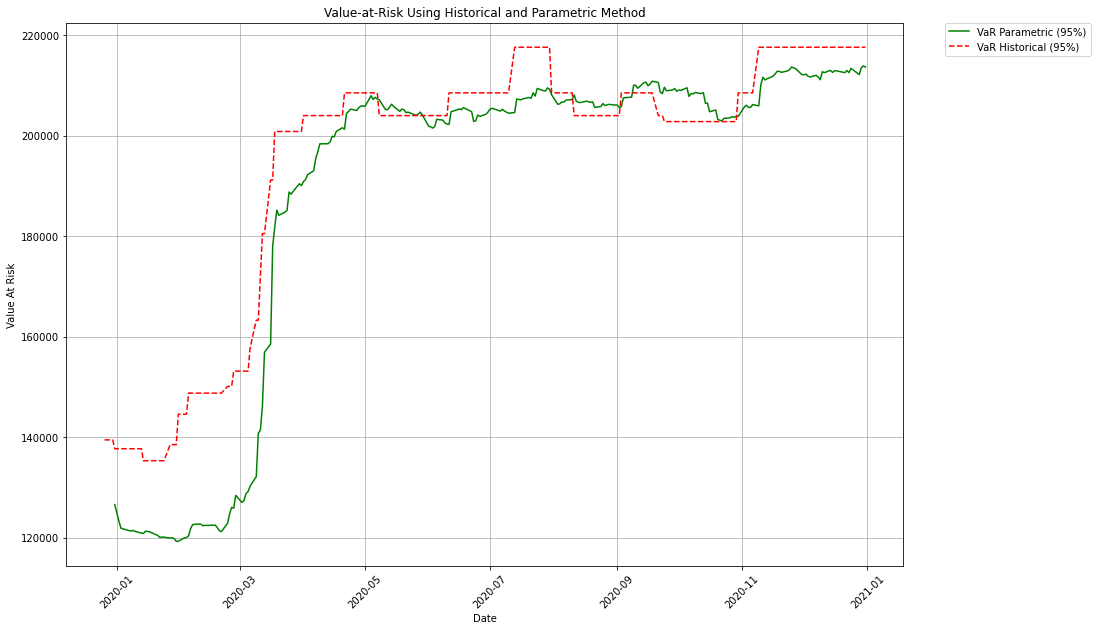

In [30]:
plt.figure(figsize=(15,10))
plt.plot(portfolio['Date'], -portfolio['Var_Para_95'], 'g-', label='VaR Parametric (95%)')
plt.plot(portfolio['Date'], -portfolio['Var_Hist_95'], 'r--', label='VaR Historical (95%)')

plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk Using Historical and Parametric Method')
plt.show()

In [31]:
print(portfolio.iloc[505]['Var_Para_95'])
print(portfolio.iloc[505]['Var_Hist_95'])
print(portfolio.iloc[505]['Date'])
print(portfolio.iloc[441]['Var_Para_95'])
print(portfolio.iloc[441]['Var_Hist_95'])
print(portfolio.iloc[441]['Date'])
print(portfolio.iloc[335]['Var_Para_95'])
print(portfolio.iloc[335]['Var_Hist_95'])
print(portfolio.iloc[335]['Date'])
print(portfolio.iloc[273]['Var_Para_95'])
print(portfolio.iloc[273]['Var_Hist_95'])
print(portfolio.iloc[273]['Date'])

-213659.74198931846
-217608.95947732395
2020-12-31 00:00:00
-208846.84329939442
-202808.60513977834
2020-09-30 00:00:00
-205940.43608112956
-208528.945305757
2020-04-30 00:00:00
-119302.75985634806
-144600.26892924923
2020-01-31 00:00:00


# WORST PORTFOLIO VAR

In [32]:
print(portfolio.iloc[441]['Var_Para_95'])
print(portfolio.iloc[441]['Var_Hist_95'])
print(portfolio.iloc[441]['Date'])

-208846.84329939442
-202808.60513977834
2020-09-30 00:00:00


In [33]:
print(portfolio.iloc[335]['Var_Para_95'])
print(portfolio.iloc[335]['Var_Hist_95'])
print(portfolio.iloc[335]['Date'])

-205940.43608112956
-208528.945305757
2020-04-30 00:00:00


In [34]:
print(portfolio.iloc[273]['Var_Para_95'])
print(portfolio.iloc[273]['Var_Hist_95'])
print(portfolio.iloc[273]['Date'])

-119302.75985634806
-144600.26892924923
2020-01-31 00:00:00


## Estimated shortfall for worst portfolio

In [35]:

ES_Hist_95 = []

alpha = 0.05
for index, row in portfolio.iterrows():
    if index < 252:

        ES_Hist_95.append(np.nan)
    else:
        sum_of_var = 0
        count = 0
        VaR = row['Var_Hist_95']
        log_returns_sorted = sorted(row['log_returns'])
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1
        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        ES_hist = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        ES_Hist_95.append(ES_hist)
        
                
                #print(f"the var is {VaR}, the return is{i}")
                #count += 1
                #print(f"The total number of values is {count}")
                
portfolio['ES_Hist_95'] = ES_Hist_95
portfolio

,AAPL_weight,TSLA_weight,SQ_weight,ROKU_weight,NOW_weight,CHGG_weight,PYPL_weight,SNAP_weight,OKTA_weight,ZS_weight,...,QRVO_todate_lgr,Date,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,ES_Hist_95
0,0.029166,0.050636,0.042671,0.023310,0.135454,0.021621,0.063972,0.004192,0.048537,0.029829,...,NaN,2018-12-31,NaN,"[0.029166463545834517, 0.050636322724291104, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN
1,0.029387,0.047488,0.043795,0.024899,0.136529,0.021813,0.065654,0.004433,0.048435,0.030480,...,NaN,2019-01-02,NaN,"[0.029387055672048436, 0.04748818823919402, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN
2,0.027826,0.048368,0.042207,0.024235,0.136169,0.022802,0.066096,0.004573,0.047956,0.031659,...,NaN,2019-01-03,NaN,"[0.027825739908344912, 0.04836784613453155, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN
3,0.027327,0.048185,0.044122,0.025580,0.135921,0.022660,0.065424,0.004512,0.047891,0.031677,...,NaN,2019-01-04,NaN,"[0.02732712985225312, 0.048184845622821805, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN
4,0.026129,0.048685,0.044127,0.030653,0.135658,0.022223,0.063174,0.004513,0.048160,0.031656,...,NaN,2019-01-07,NaN,"[0.026128879924115014, 0.048684913115246614, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.019866,0.100089,0.034526,0.053993,0.083773,0.013977,0.036093,0.007585,0.041683,0.031046,...,"[-0.005406554820029962, 0.00017212418086562495...",2020-12-24,"[[0.0008691795135262748, 0.0008263745524936805...","[0.01986647283525373, 0.10008947822703937, 0.0...","[0.002402377184232215, 0.008062151712878543, 0...",0.000948,0.004241,-213408.985896,-217608.959477,0.001383
502,0.021200,0.103417,0.034801,0.053043,0.084727,0.014290,0.036732,0.007520,0.040942,0.031066,...,"[0.00017212418086562495, -0.002325719379178024...",2020-12-28,"[[0.00086924186036752, 0.0008273525390389835, ...","[0.02119967572939628, 0.10341737317016635, 0.0...","[0.002409436838753365, 0.008307202435215825, 0...",0.000942,0.004355,-212162.029502,-217608.959477,0.001453
503,0.020984,0.104106,0.033452,0.053081,0.085346,0.013839,0.036114,0.008008,0.040916,0.030926,...,"[-0.002325719379178024, -0.03171534165241456, ...",2020-12-29,"[[0.0008734404255037465, 0.0008266353979502483...","[0.02098388897395472, 0.10410559959917039, 0.0...","[0.0025208818241072148, 0.008283929959948172, ...",0.000948,0.004219,-213513.370366,-217608.959477,0.001436
504,0.020641,0.107750,0.034280,0.052533,0.084890,0.014046,0.035904,0.007653,0.040403,0.031220,...,"[-0.03171534165241456, -0.006250551304859677, ...",2020-12-30,"[[0.0008728248945220063, 0.0008253323209392871...","[0.020640980755632986, 0.10774994475869741, 0....","[0.0023770243632027428, 0.008185291413455427, ...",0.000947,0.004130,-213899.314988,-217608.959477,0.001381


In [36]:
ES_Para_95 = []

for index, row in portfolio.iterrows():
    if index < 252:
        ES_Para_95.append(np.nan)

    else:
        mu = np.mean(row['log_returns'])
        sigma = np.std(row['log_returns'])
        es_99 = mu+sigma*norm.pdf(norm.ppf(0.99, loc=0, scale=1), loc=0, scale=1)/(1-0.99)
        es_95 = mu+sigma*norm.pdf(norm.ppf(0.95, loc=0, scale=1), loc=0, scale=1)/(1-0.95)
        ES_Para_95.append(es_95)
        
#df = pd.DataFrame({99:ES_Para_99,95:ES_95})
    
portfolio['ES_Para_95'] = ES_Para_95
#df
portfolio

,AAPL_weight,TSLA_weight,SQ_weight,ROKU_weight,NOW_weight,CHGG_weight,PYPL_weight,SNAP_weight,OKTA_weight,ZS_weight,...,Date,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,ES_Hist_95,ES_Para_95
0,0.029166,0.050636,0.042671,0.023310,0.135454,0.021621,0.063972,0.004192,0.048537,0.029829,...,2018-12-31,NaN,"[0.029166463545834517, 0.050636322724291104, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN
1,0.029387,0.047488,0.043795,0.024899,0.136529,0.021813,0.065654,0.004433,0.048435,0.030480,...,2019-01-02,NaN,"[0.029387055672048436, 0.04748818823919402, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN
2,0.027826,0.048368,0.042207,0.024235,0.136169,0.022802,0.066096,0.004573,0.047956,0.031659,...,2019-01-03,NaN,"[0.027825739908344912, 0.04836784613453155, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN
3,0.027327,0.048185,0.044122,0.025580,0.135921,0.022660,0.065424,0.004512,0.047891,0.031677,...,2019-01-04,NaN,"[0.02732712985225312, 0.048184845622821805, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN
4,0.026129,0.048685,0.044127,0.030653,0.135658,0.022223,0.063174,0.004513,0.048160,0.031656,...,2019-01-07,NaN,"[0.026128879924115014, 0.048684913115246614, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.019866,0.100089,0.034526,0.053993,0.083773,0.013977,0.036093,0.007585,0.041683,0.031046,...,2020-12-24,"[[0.0008691795135262748, 0.0008263745524936805...","[0.01986647283525373, 0.10008947822703937, 0.0...","[0.002402377184232215, 0.008062151712878543, 0...",0.000948,0.004241,-213408.985896,-217608.959477,0.001383,0.009216
502,0.021200,0.103417,0.034801,0.053043,0.084727,0.014290,0.036732,0.007520,0.040942,0.031066,...,2020-12-28,"[[0.00086924186036752, 0.0008273525390389835, ...","[0.02119967572939628, 0.10341737317016635, 0.0...","[0.002409436838753365, 0.008307202435215825, 0...",0.000942,0.004355,-212162.029502,-217608.959477,0.001453,0.008821
503,0.020984,0.104106,0.033452,0.053081,0.085346,0.013839,0.036114,0.008008,0.040916,0.030926,...,2020-12-29,"[[0.0008734404255037465, 0.0008266353979502483...","[0.02098388897395472, 0.10410559959917039, 0.0...","[0.0025208818241072148, 0.008283929959948172, ...",0.000948,0.004219,-213513.370366,-217608.959477,0.001436,0.008483
504,0.020641,0.107750,0.034280,0.052533,0.084890,0.014046,0.035904,0.007653,0.040403,0.031220,...,2020-12-30,"[[0.0008728248945220063, 0.0008253323209392871...","[0.020640980755632986, 0.10774994475869741, 0....","[0.0023770243632027428, 0.008185291413455427, ...",0.000947,0.004130,-213899.314988,-217608.959477,0.001381,0.008540


# WORST PORTFOLIO ES

In [37]:
print(portfolio.iloc[505]['ES_Para_95'])
print(portfolio.iloc[505]['ES_Hist_95'])
print(portfolio.iloc[505]['Date'])
print("\n")
print(portfolio.iloc[441]['ES_Para_95'])
print(portfolio.iloc[441]['ES_Hist_95'])
print(portfolio.iloc[441]['Date'])
print("\n")
print(portfolio.iloc[335]['ES_Para_95'])
print(portfolio.iloc[335]['ES_Hist_95'])
print(portfolio.iloc[335]['Date'])
print("\n")
print(portfolio.iloc[273]['ES_Para_95'])
print(portfolio.iloc[273]['ES_Hist_95'])
print(portfolio.iloc[273]['Date'])

0.00862810622360267
0.0015947077873837696
2020-12-31 00:00:00


0.008418084540530555
0.00047806714666896987
2020-09-30 00:00:00


0.004141816884787292
-0.0010724040474443285
2020-04-30 00:00:00


0.005455777680043787
-0.002643063207312923
2020-01-31 00:00:00


## Worst portfolio backtesting

In [38]:
df["log_return_nextday"] = df["log_returns"].shift(-1)
portfolio['log_return_nextday'] = df['log_return_nextday']

In [39]:
log_returns_2020 = portfolio[253:]['log_return_nextday']
date_2020 = portfolio[253:]['Date']
date_2020

lg_returns = pd.DataFrame({'returns':log_returns_2020,'date':date_2020})
lg_returns

,returns,date
253,-19270.318143,2020-01-02
254,20002.131149,2020-01-03
255,-11638.823890,2020-01-06
256,57401.268452,2020-01-07
257,79913.163717,2020-01-08
...,...,...
501,-100755.503587,2020-12-24
502,4760.254345,2020-12-28
503,50779.064182,2020-12-29
504,-6673.900178,2020-12-30


In [40]:
portfolio_bt = deepcopy(portfolio)
portfolio_bt = portfolio_bt[253:]
portfolio_bt

exception_parametric_date = portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']]['Date']
exception_historical_date = portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']]['Date']

In [41]:
print(f'There are {len(exception_parametric_date)} days where losses exceed VaR using parametric')
print(f'There are {len(exception_historical_date)} days where losses exceed VaR using historical')

There are 21 days where losses exceed VaR using parametric
There are 19 days where losses exceed VaR using historical


In [42]:
observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05


print("VaR 95% Historical Method") 
print("VaR level: %s" %(0.95))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

VaR 95% Historical Method
VaR level: 0.95
Observed level: 0.924901185770751
Observations: 253
Failures: 19
Expected: 12.65


In [43]:
#Parametric

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05


print("VaR 95% Parametric Method") 
print("VaR level: %s" %(0.99))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

VaR 95% Parametric Method
VaR level: 0.99
Observed level: 0.9169960474308301
Observations: 253
Failures: 21
Expected: 12.65


## Z-Score Test

In [44]:
#parametric
from scipy.stats import binom

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_95 = 1-binom.cdf(failures, observations, 0.05)
print("P-value of VaR 95%: ", p_value_95)
if(p_value_95 < backtesting_alpha):
    print("Reject null hypothesis under binomial distribution, using parametric method")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution, using parametric method")

P-value of VaR 95%:  0.008874783434514422
Reject null hypothesis under binomial distribution, using parametric method


In [45]:
#Historical
from scipy.stats import binom

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_95 = 1-binom.cdf(failures, observations, 0.05)
print("P-value of VaR 95%: ", p_value_95)
if(p_value_95 < backtesting_alpha):
    print("Reject null hypothesis under binomial distribution, using historical method")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution, using historical method")

P-value of VaR 95%:  0.0302623968900394
Reject null hypothesis under binomial distribution, using historical method


In [46]:
from scipy.stats import norm

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected

z_score = (failures-expected)/sqrt(expected*0.95)
p_VaR_95 = 1-norm.cdf(z_score, 0, 1)
print("z score: ", z_score)
print("P-value of VaR 95%: ", p_VaR_95)
if(p_VaR_95 < backtesting_alpha):
    print("Reject null hypothesis using parametric method")
else:
    print(f"Not enough evidence to reject null {backtesting_alpha} backtesting significance level under normal distribution using parametric method ")

z score:  2.4086816833348976
P-value of VaR 95%:  0.008005127608379459
Reject null hypothesis using parametric method


In [47]:
#Historical
from scipy.stats import norm

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected

z_score = (failures-expected)/sqrt(expected*0.95)
p_VaR_99 = 1-norm.cdf(z_score, 0, 1)
print("z score: ", z_score)
print("P-value of VaR 99%: ", p_VaR_95)
if(p_VaR_95 < backtesting_alpha):
    print("Reject null hypothesis using parametric method")
else:
    print(f"Not enough evidence to reject null {backtesting_alpha} backtesting significance level under normal distribution using parametric method ")

z score:  1.8317519388235448
P-value of VaR 99%:  0.008005127608379459
Reject null hypothesis using parametric method


In [48]:
#Historical
from copy import deepcopy
df_95 = deepcopy(portfolio_bt)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_95['ind_t'] = df_95.apply(lambda row: 1 if row['Var_Hist_95']>row['log_return_nextday'] else 0, axis=1)
df_95['ind_t1'] = df_95['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_95['ind_00'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_10'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_95['ind_01'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_11'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_95.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures


N00, N10, N01, N11 = df_95[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1


In [49]:
N00, N10, N01, N11


(215, 17, 17, 2)

In [50]:
#Historical
from copy import deepcopy
df_95 = deepcopy(portfolio_bt)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_95['ind_t'] = df_95.apply(lambda row: 1 if row['Var_Para_95']>row['log_return_nextday'] else 0, axis=1)
df_95['ind_t1'] = df_95['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_95['ind_00'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_10'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_95['ind_01'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_11'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_95.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures


N00, N10, N01, N11 = df_95[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1

In [51]:
N00, N10, N01, N11

(213, 17, 17, 4)

## VaR for optimal portfolio

## Get stock price at the start of 2020 for all stocks

In [52]:
for item in stocks_data:
    stock_return = {}
    stock_return[item] = stocks_data[item]['Adj Close']#* num_shares[item]
    all_returns.append(stock_return)

all_returns 

[{'AAPL': Date
  2018-12-31     38.338482
  2019-01-02     38.382233
  2019-01-03     34.559071
  2019-01-04     36.034382
  2019-01-07     35.954174
                   ...    
  2020-12-24    131.352829
  2020-12-28    136.050766
  2020-12-29    134.239273
  2020-12-30    133.094650
  2020-12-31    132.069473
  Name: Adj Close, Length: 506, dtype: float64},
 {'TSLA': Date
  2018-12-31     66.559998
  2019-01-02     62.023998
  2019-01-03     60.071999
  2019-01-04     63.537998
  2019-01-07     66.991997
                   ...    
  2020-12-24    661.770020
  2020-12-28    663.690002
  2020-12-29    665.989990
  2020-12-30    694.780029
  2020-12-31    705.669983
  Name: Adj Close, Length: 506, dtype: float64},
 {'SQ': Date
  2018-12-31     56.090000
  2019-01-02     57.200001
  2019-01-03     52.419998
  2019-01-04     58.180000
  2019-01-07     60.720001
                   ...    
  2020-12-24    228.279999
  2020-12-28    223.339996
  2020-12-29    214.000000
  2020-12-30    221.03

In [53]:
new_df

,QRVO
Date,
2018-12-31,60.730000
2019-01-02,61.180000
2019-01-03,55.639999
2019-01-04,59.369999
2019-01-07,59.779999
...,...
2020-12-24,167.110001
2020-12-28,166.440002
2020-12-29,163.770004


In [54]:
stocks_adj_returns = get_data_for_multiple_stocks(tickers)[2]
total_portfolio_value = 0

for item in col_names:
    new_df = pd.DataFrame(stocks_adj_returns[item])
    value = new_df.iloc[253]['Adj Close']  * num_shares[item]
    total_portfolio_value += value
    print(value)
    
total_portfolio_value

39654942.62527466
8209360.986328125
16358991.169281006
18888267.840881348
23948664.396972656
19039614.0045166
18567237.5
12788541.92331314
17465112.436523438
8935431.045684814
16743737.89855957
13070310.42175293
16695223.605651855
12700022.87902832
4897292.511978149
1801447.2138547897
7444730.549240112
11508011.483154297
2321729.08182621
9249868.7109375
486709.85820770264
4132189.061126709
5384714.203834534
6570293.548126221


296862444.9560547

## using the total portfolio value, we can now use the new weights generated by the optimal portfolio


In [55]:
total_portfolio_value = 270105461.50778675

In [56]:
weights = {'NVDA' :0.02, 'QCOM':0.04, 'NXPI':0.01,'MU':0.02,'MRVL':0.04,
          'AMD':0.04,'MCHP':0.01,'AVGO':0.03, 'XLNX':0.05, 'LRCX':0.00,
          'ON':0.00,'INTC':0.05,'TXN':0.06,'ENPH':0.00,'AMAT':0.01,
          'CRUS':0.02,'JBL':0.03,'ADI':0.04,'OLED':0.04,'TSM':0.07,
          'IIVI':0.03,'DIOD':0.04,'AEIS':0.00, 'MTSI':0.01,
          'TTMI':0.05,'FLEX':0.02,'MXL':0.00,'SMTC':0.01,'SYNA':0.04,
          'AOSL':0.02}

In [57]:
price_per_stock = {'NVDA': 59.833770751953125,
 'QCOM': 85.23181915283203,
 'NXPI': 125.79685974121094,
 'MU': 55.31268310546875,
 'MRVL': 27.127023696899414,
 'AMD': 49.099998474121094,
 'MCHP': 105.23179626464844,
 'AVGO': 301.33160400390625,
 'XLNX': 100.11534881591797,
 'LRCX': 291.0453186035156,
 'ON': 25.059999465942383,
 'INTC': 58.26591491699219,
 'TXN': 123.73091125488281,
 'ENPH': 29.34000015258789,
 'AMAT': 61.03724670410156,
 'CRUS': 85.0,
 'JBL': 41.377220153808594,
 'ADI': 116.50666809082031,
 'OLED': 211.5386962890625,
 'TSM': 57.80479431152344,
 'IIVI': 35.31999969482422,
 'DIOD': 57.29999923706055,
 'AEIS': 71.49348449707031,
 'MTSI': 26.299999237060547,
 'TTMI': 15.15999984741211,
 'FLEX': 12.779999732971191,
 'MXL': 21.549999237060547,
 'SMTC': 53.86000061035156,
 'SYNA': 66.26000213623047,
 'AOSL': 13.680000305175781}

In [58]:
weights = {'NVDA': 0.02942,
             'QCOM': 0.04801,
             'NXPI': 0.02621,
             'MU': 0.02344,
             'MRVL': 0.04584,
             'AMD': 0.03209,
             'MCHP': 0.02188,
             'AVGO': 0.0471,
             'XLNX': 0.04984,
             'LRCX': 0.01742,
             'ON': 0.0,
             'INTC': 0.06159,
             'TXN': 0.06223,
             'ENPH': 0.00667,
             'AMAT': 0.02393,
             'CRUS': 0.03261,
             'JBL': 0.0431,
             'ADI': 0.04628,
             'OLED': 0.03983,
             'TSM': 0.07331,
             'IIVI': 0.03002,
             'DIOD': 0.04296,
             'AEIS': 0.01033,
             'MTSI': 0.02099,
             'TTMI': 0.0474,
             'FLEX': 0.02657,
             'MXL': 0.00816,
             'SMTC': 0.01911,
             'SYNA': 0.03975,
             'AOSL': 0.02388}

In [69]:
weights = {'NVDA': 0.02139,
             'QCOM': 0.0,
             'NXPI': 0.01669,
             'MU': 0.07371,
             'MRVL': 0.0,
             'AMD':0.0,
             'MCHP': 0.0919,
             'AVGO': 0.0,
             'XLNX': 0.0,
             'LRCX': 0.12574,
             'ON': 0.22137,
             'INTC': 0.0,
             'TXN': 0.0,
             'ENPH': 0.04647,
             'AMAT': 0.04006,
             'CRUS': 0.0,
             'JBL': 0.0,
             'ADI': 0.0,
             'OLED': 0.0,
             'TSM': 0.0,
             'IIVI': 0.0,
             'DIOD': 0.0,
             'AEIS': 0.1139,
             'MTSI': 0.023,
             'TTMI': 0.0,
             'FLEX': 0.0,
             'MXL': 0.12363,
             'SMTC': 0.10216,
             'SYNA': 0.0,
             'AOSL': 0.0}

In [70]:
column_names

Index(['AAPL', 'TSLA', 'SQ', 'ROKU', 'NOW', 'CHGG', 'PYPL', 'SNAP', 'OKTA',
       'ZS', 'COUP', 'SHOP', 'TWTR', 'RNG', 'SE', 'NIO', 'Z', 'PAYC', 'APPS',
       'PCTY', 'TTD', 'TWLO', 'MRVL', 'QRVO'],
      dtype='object')

In [71]:
no_of_stocks = {}

for stock in weights:
    no_of_stocks[stock] = total_portfolio_value * weights[stock] /price_per_stock[stock]



In [72]:
no_of_stocks

{'NVDA': 96560.11561770014,
 'QCOM': 0.0,
 'NXPI': 35836.03089806004,
 'MU': 359944.0932882628,
 'MRVL': 0.0,
 'AMD': 0.0,
 'MCHP': 235885.85193527228,
 'AVGO': 0.0,
 'XLNX': 0.0,
 'LRCX': 116693.37577030814,
 'ON': 2386003.4831700753,
 'INTC': 0.0,
 'TXN': 0.0,
 'ENPH': 427805.0692225282,
 'AMAT': 177275.76803156864,
 'CRUS': 0.0,
 'JBL': 0.0,
 'ADI': 0.0,
 'OLED': 0.0,
 'TSM': 0.0,
 'IIVI': 0.0,
 'DIOD': 0.0,
 'AEIS': 430319.1022532635,
 'MTSI': 236213.90855117893,
 'TTMI': 0.0,
 'FLEX': 0.0,
 'MXL': 1549565.6328738949,
 'SMTC': 512327.7689367887,
 'SYNA': 0.0,
 'AOSL': 0.0}

## Historical simulation for optimal portfolio

In [73]:
tickers = ['NVDA', 'QCOM', 'NXPI','MU','MRVL',
          'AMD','MCHP','AVGO', 'XLNX',
          'INTC','TXN','AMAT',
          'CRUS','JBL','ADI','OLED','TSM',
          'IIVI','DIOD', 'MTSI',
          'TTMI','FLEX','SMTC','SYNA',
          'AOSL']

In [74]:
tickers = ['NVDA', 
             'NXPI',
             'MU',
             'MCHP', 
             'LRCX', 
             'ON', 
             'ENPH', 
             'AMAT', 
             'AEIS',
             'MTSI', 
             'MXL', 
             'SMTC', ]


In [75]:
stocks_data = get_data_for_multiple_stocks(tickers)[0]
stocks_log_returns = get_data_for_multiple_stocks(tickers)[1]
#print(stocks_data)
stocks_log_returns.head()

,NVDA,NXPI,MU,MCHP,LRCX,ON,ENPH,AMAT,AEIS,MTSI,MXL,SMTC
Date,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.020170,0.023600,0.031640,-0.007957,0.015521,0.016221,0.039383,0.022351,0.009736,0.024508,0.002270,0.006086
2019-01-03,-0.062319,-0.041639,-0.054916,-0.073106,-0.049430,-0.069717,-0.033061,-0.059692,-0.055978,-0.050338,-0.055359,-0.068142
2019-01-04,0.062099,0.047221,0.053388,0.039760,0.047693,0.052889,0.065064,0.066241,0.047639,0.037478,0.028354,0.060747
2019-01-07,0.051587,0.007395,0.038986,0.028851,0.008870,0.029853,0.034820,0.017647,0.024131,0.036124,0.013307,0.036017


In [76]:
for index, row in stocks_log_returns.iterrows():
    
    for name in tickers:
        
        row[name] *= no_of_stocks[name]
    

In [77]:
stocks_log_returns

,NVDA,NXPI,MU,MCHP,LRCX,ON,ENPH,AMAT,AEIS,MTSI,MXL,SMTC
Date,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1947.616167,845.742973,11388.753453,-1876.918048,1811.190121,38704.484314,16848.392270,3962.230973,4189.481981,5789.052545,3517.656949,3117.877555
2019-01-03,-6017.538325,-1492.172712,-19766.596650,-17244.689155,-5768.166640,-166344.645381,-14143.590531,-10581.891032,-24088.575852,-11890.551798,-85782.785537,-34911.034269
2019-01-04,5996.267508,1692.207559,19216.639720,9378.834615,5565.496904,126194.503296,27834.508060,11742.992689,20500.099773,8852.909719,43936.243998,31122.597821
2019-01-07,4981.238504,264.999140,14032.601675,6805.501120,1035.014957,71229.274058,14896.097085,3128.444374,10383.942585,8533.068239,20619.302755,18452.386309
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-115.133583,107.219677,3227.336278,1331.766623,2259.193404,14213.616045,2531.029589,2721.592127,7549.658651,2611.561215,31098.998826,4088.027098
2020-12-28,-699.197125,190.820588,407.748374,-898.542752,-1034.635272,-2985.229418,-14146.364331,-958.246877,-2574.868134,648.411907,-5069.582777,1355.476995
2020-12-29,323.184877,-515.731595,-2299.679939,-1894.677382,-708.032087,-21755.949756,-13094.212348,-1257.740003,-13606.956123,-7544.053848,-45951.400815,-9927.505376


In [78]:
stocks_log_returns = stocks_log_returns.assign(log_returns = lambda row: row.sum(axis = 1)).reset_index()
stocks_log_returns

,Date,NVDA,NXPI,MU,MCHP,LRCX,ON,ENPH,AMAT,AEIS,MTSI,MXL,SMTC,log_returns
0,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,2019-01-02,1947.616167,845.742973,11388.753453,-1876.918048,1811.190121,38704.484314,16848.392270,3962.230973,4189.481981,5789.052545,3517.656949,3117.877555,90245.561254
2,2019-01-03,-6017.538325,-1492.172712,-19766.596650,-17244.689155,-5768.166640,-166344.645381,-14143.590531,-10581.891032,-24088.575852,-11890.551798,-85782.785537,-34911.034269,-398032.237882
3,2019-01-04,5996.267508,1692.207559,19216.639720,9378.834615,5565.496904,126194.503296,27834.508060,11742.992689,20500.099773,8852.909719,43936.243998,31122.597821,312033.301664
4,2019-01-07,4981.238504,264.999140,14032.601675,6805.501120,1035.014957,71229.274058,14896.097085,3128.444374,10383.942585,8533.068239,20619.302755,18452.386309,174361.870799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2020-12-24,-115.133583,107.219677,3227.336278,1331.766623,2259.193404,14213.616045,2531.029589,2721.592127,7549.658651,2611.561215,31098.998826,4088.027098,71624.865951
502,2020-12-28,-699.197125,190.820588,407.748374,-898.542752,-1034.635272,-2985.229418,-14146.364331,-958.246877,-2574.868134,648.411907,-5069.582777,1355.476995,-25764.208822
503,2020-12-29,323.184877,-515.731595,-2299.679939,-1894.677382,-708.032087,-21755.949756,-13094.212348,-1257.740003,-13606.956123,-7544.053848,-45951.400815,-9927.505376,-118232.754393
504,2020-12-30,1499.021791,791.083628,8661.555353,2827.689779,2736.904626,61011.186504,6807.511383,5611.194288,8632.165605,8061.495025,119901.830245,10497.112806,237038.751035


In [79]:
from copy import deepcopy
df = deepcopy(stocks_log_returns)

for i in range(0, len(df)):
    past_250 = df.loc[(i-249):(i), 'log_returns']
    past_250.dropna(inplace=True)
    
    if len(past_250) == 250:
        #print(past_250)
        df.loc[i, 'VaR_95'] = past_250.quantile(0.05)       
    else:
        df.loc[i, 'VaR_95'] = np.NaN

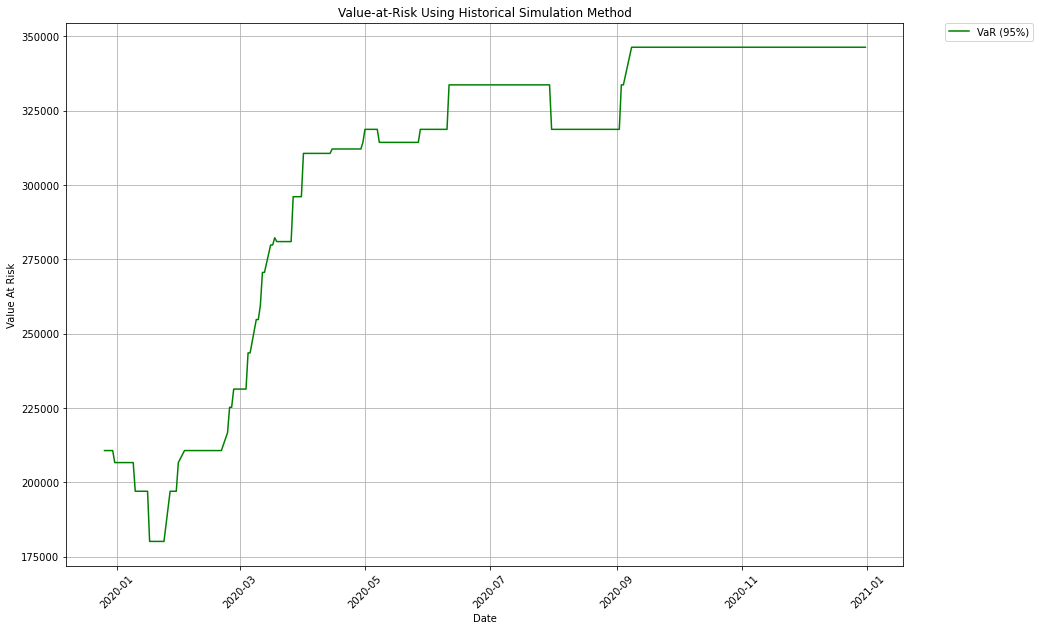

In [80]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'], -df['VaR_95'], 'g-', label='VaR (95%)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk Using Historical Simulation Method')
plt.show()

In [81]:
#create a list of all the stocks returns of each stock in the portfolio

all_returns = []

for item in stocks_data:
    stock_return = {}
    stock_return[item] = stocks_data[item]['Adj Close']#* num_shares[item]
    all_returns.append(stock_return)

column_names

Index(['AAPL', 'TSLA', 'SQ', 'ROKU', 'NOW', 'CHGG', 'PYPL', 'SNAP', 'OKTA',
       'ZS', 'COUP', 'SHOP', 'TWTR', 'RNG', 'SE', 'NIO', 'Z', 'PAYC', 'APPS',
       'PCTY', 'TTD', 'TWLO', 'MRVL', 'QRVO'],
      dtype='object')

In [82]:
returns_df = pd.DataFrame(all_returns[0])
returns_df

,NVDA
Date,
2018-12-31,33.165485
2019-01-02,33.841225
2019-01-03,31.796640
2019-01-04,33.833771
2019-01-07,35.624954
...,...
2020-12-24,129.839996
2020-12-28,128.903214
2020-12-29,129.335373


In [83]:
#all_returns is a dictionary. we will make a dataframe for all the log returns for each day for each stock

for i in range(1,len(all_returns)):
    new_df = pd.DataFrame(all_returns[i])
    returns_df = pd.concat([new_df,returns_df],axis = 1)
    
cols = returns_df.columns


In [84]:
#work with returns_df from now on. note that when we find the weights here, we need to 
#multiply each stock by the weight (the number of stocks bought)

for column in returns_df.columns:
    returns_df[f'{column}_prev_return'] = returns_df[column].shift(1)

returns_df

,SMTC,MXL,MTSI,AEIS,AMAT,ENPH,ON,LRCX,MCHP,MU,...,MTSI_prev_return,AEIS_prev_return,AMAT_prev_return,ENPH_prev_return,ON_prev_return,LRCX_prev_return,MCHP_prev_return,MU_prev_return,NXPI_prev_return,NVDA_prev_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,45.869999,17.600000,14.510000,42.794407,31.549807,4.730000,16.510000,130.249817,69.187401,31.685709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,46.150002,17.639999,14.870000,43.213078,32.262905,4.920000,16.780001,132.287186,68.639069,32.704285,...,14.510000,42.794407,31.549807,4.730000,16.510000,130.249817,69.187401,31.685709,70.874229,33.165485
2019-01-03,43.110001,16.690001,14.140000,40.860538,30.393429,4.760000,15.650000,125.907196,63.800167,30.956728,...,14.870000,43.213078,32.262905,4.920000,16.780001,132.287186,68.639069,32.704285,72.566780,33.841225
2019-01-04,45.810001,17.170000,14.680000,42.854218,32.474911,5.080000,16.500000,132.057632,66.387970,32.654354,...,14.140000,40.860538,30.393429,4.760000,15.650000,125.907196,63.800167,30.956728,69.607224,31.796640
2019-01-07,47.490002,17.400000,15.220000,43.900902,33.053093,5.260000,17.000000,133.234131,68.331215,33.952541,...,14.680000,42.854218,32.474911,5.080000,16.500000,132.057632,66.387970,32.654354,72.972977,33.833771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,71.720001,36.740002,54.570000,98.587631,84.864464,181.389999,31.990000,477.047455,135.632126,70.481483,...,53.970001,96.873062,83.571548,180.320007,31.799999,467.900604,134.868530,69.852356,155.544891,129.994904
2020-12-28,71.910004,36.619999,54.720001,97.999481,84.406975,175.490005,31.950001,472.836517,135.116455,70.561371,...,54.570000,98.587631,84.864464,181.389999,31.990000,477.047455,135.632126,70.481483,156.010971,129.839996
2020-12-29,70.529999,35.549999,53.000000,94.949158,83.810242,170.199997,31.660000,469.976288,134.035522,70.111992,...,54.720001,97.999481,84.406975,175.490005,31.950001,472.836517,135.116455,70.561371,156.843918,128.903214


In [85]:
column_names = df.columns.drop(['log_returns','VaR_95','Date'])

In [86]:

log_returns_list = {}

for index, row in returns_df.iterrows():
    #for every column name, we find the log return for that stock for that day
    for item in tickers:
        current = item
        prev = item + "_prev_return"
        
        log_return = np.log(row[current]/row[prev])
        
        #if stock already added to log returns list
        namestr = f"{item}_log_return"
        if namestr in log_returns_list:
            log_returns_list[namestr].append(log_return)
        else: 
            log_returns_list[namestr] = []
            log_returns_list[namestr].append(log_return)
        
#log_returns_list here is a dictionary {stock:[nan, log return day 1, log return day 2 ...]}

In [87]:
#here, we need to multiply the weights in once we get the optimisation, once again
stock_weights_daily = {}

for index, row in returns_df.iterrows():
    daily_total = 0
    daily_stocks = {}
    #for every column name, we find the return for that stock for that day.
    #we then add that value to the daily total.
    for item in column_names:
        current = item
        
        daily_return = row[current]
        daily_total += daily_return
        
        #if stock already added to returns list
        daily_stocks[item] = daily_return
    
    #after processing all of the stock returns for each row, we can calculated weighted returns
    
    for item in column_names:
        daily_stocks[item] = daily_stocks[item]/daily_total
    #we then add everything into a consolidated dictionary which holds the stock weights for all days
        namestr = f"{item}_weight"
        if namestr in stock_weights_daily:
            stock_weights_daily[namestr].append(daily_stocks[item])
        else:
            stock_weights_daily[namestr] = [] 
            stock_weights_daily[namestr].append(daily_stocks[item])
        

In [88]:
weight_df = pd.DataFrame(stock_weights_daily)
returns_df = pd.DataFrame(log_returns_list)

In [89]:
portfolio = pd.concat([weight_df, returns_df], axis = 1)
portfolio.shape

(506, 24)

In [90]:
todate_logreturns = {}

for item in column_names:
    namestr = f"{item}_todate_lgr"
    todate_logreturns[namestr] = []
    

In [91]:
for i in tqdm(range(len(portfolio))):
    if i < 252:
        for item in column_names:
            namestr = f"{item}_todate_lgr"
            todate_logreturns[namestr].append(np.nan)
        
    else:
    #get the index j of the item 250 days before
        temp_dict = {}
        j = i-250
        #for the past 250 days
        for index in range(j,i):
            #for each stock
            for item in column_names:
                stock_return = f"{item}_log_return"
                if item in temp_dict:
                    temp_dict[item].append(portfolio.iloc[index][stock_return])
                else:
                    temp_dict[item] = []
                    temp_dict[item].append(portfolio.iloc[index][stock_return])
                    
                
        for item in temp_dict:

            todate_logreturns[f"{item}_todate_lgr"].append(temp_dict[item])
                    

100%|██████████| 506/506 [01:24<00:00,  5.98it/s] 


In [92]:
lgreturns = pd.DataFrame(todate_logreturns)

In [93]:
portfolio = pd.concat([portfolio, lgreturns], axis = 1)
portfolio['Date'] = returns_df.index
portfolio['Date']

0        0
1        1
2        2
3        3
4        4
      ... 
501    501
502    502
503    503
504    504
505    505
Name: Date, Length: 506, dtype: int64

In [94]:

cov_matrices = []

#contains the weight of each stock for that particular day
weight_matrices = []

#average log returns for each stock.
log_returns = []

for index,row in portfolio.iterrows():
    mat_df = []
    weight_mat = []
    mean_returns = []
    
    #calculating covariance matrix
    for item in column_names:
        colname = f"{item}_todate_lgr"
        lgr = row[colname]
        mat_df.append(lgr)
        
        weight = f"{item}_weight"
        weight_mat.append(row[weight])
        
        #################
        mean_returns.append(np.mean(row[colname]))
        
    covariance = (np.exp(np.cov(mat_df))-1)
    cov_matrices.append(covariance)
    weight_matrices.append(weight_mat)
    log_returns.append(mean_returns)

In [95]:
portfolio['covariance_matrix'] = cov_matrices
portfolio['weight_matrix'] = weight_matrices
portfolio['log_returns'] = log_returns
portfolio[['covariance_matrix','weight_matrix','log_returns']]
portfolio

,NVDA_weight,NXPI_weight,MU_weight,MCHP_weight,LRCX_weight,ON_weight,ENPH_weight,AMAT_weight,AEIS_weight,MTSI_weight,...,ENPH_todate_lgr,AMAT_todate_lgr,AEIS_todate_lgr,MTSI_todate_lgr,MXL_todate_lgr,SMTC_todate_lgr,Date,covariance_matrix,weight_matrix,log_returns
0,0.065193,0.139317,0.062284,0.136001,0.256031,0.032454,0.009298,0.062017,0.084121,0.028522,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.06519310916865576, 0.139316862796346, 0.062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.065600,0.140667,0.063396,0.133054,0.256433,0.032527,0.009537,0.062540,0.083767,0.028825,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"[0.06559972016087319, 0.1406674998692862, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.065201,0.142734,0.063479,0.130826,0.258180,0.032091,0.009761,0.062324,0.083787,0.028995,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,"[0.06520088373953767, 0.14273371120396677, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.066020,0.142393,0.063719,0.129544,0.257686,0.032197,0.009913,0.063369,0.083622,0.028645,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,"[0.06602022673917737, 0.14239301028159637, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.067989,0.140300,0.064797,0.130408,0.254273,0.032444,0.010039,0.063081,0.083783,0.029047,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,"[0.0679889629398948, 0.14029999998816964, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.084925,0.102043,0.046100,0.088714,0.312025,0.020924,0.118643,0.055508,0.064484,0.035693,...,"[-0.053340837122215067, 0.029516640723955608, ...","[-0.003931116844686818, 0.0018036724300193295,...","[-0.003784360890230596, -0.0001405921900130226...","[-0.025476752960865802, -0.00524933298564653, ...","[-0.00514623874249002, -0.004701484156158297, ...","[0.008409882210915562, 0.006828566026111719, 0...",501,"[[0.0013582756070600333, 0.000947983841149691,...","[0.08492523611392672, 0.10204304473289537, 0.0...","[0.003154709605840631, 0.0008599703554229809, ..."
502,0.084952,0.103366,0.046503,0.089047,0.311618,0.021056,0.115655,0.055628,0.064586,0.036063,...,"[0.029516640723955608, 0.11586773050061253, -0...","[0.0018036724300193295, 0.018825644427415827, ...","[-0.00014059219001302263, 0.007277026362030287...","[-0.00524933298564653, -0.011342319954006632, ...","[-0.004701484156158297, 0.015431680319108868, ...","[0.006828566026111719, 0.01798473100679408, -0...",502,"[[0.0013563012304458333, 0.0009474125813009326...","[0.08495240974172069, 0.10336645931877383, 0.0...","[0.0032275233478735368, 0.0008919583201948362,..."
503,0.086352,0.103223,0.046811,0.089491,0.313786,0.021138,0.113636,0.055957,0.063394,0.035386,...,"[0.11586773050061253, -0.0017055858185369233, ...","[0.018825644427415827, -0.016044418429182424, ...","[0.0072770263620302875, -0.0023732641101541687...","[-0.011342319954006632, -0.00840017604154289, ...","[0.015431680319108868, -0.022051061092629057, ...","[0.01798473100679408, -0.01628485053580772, -0...",503,"[[0.0013563712067727884, 0.0009473496973226858...","[0.08635245181066219, 0.10322262958879042, 0.0...","[0.0031475769390111267, 0.0009223625198750846,..."
504,0.085741,0.103165,0.046878,0.088543,0.314044,0.021200,0.112875,0.056464,0.063231,0.035795,...,"[-0.0017055858185369233, 0.012553139468241112,...","[-0.016044418429182424, -0.021801127831530865,...","[-0.0023732641101541687, -0.026052644348477087...","[-0.00840017604154289, 0.023494859847643823, -...","[-0.022051061092629057, -0.01770808885343042, ...","[-0.01628485053580772, -0.017898467776672252, ...",504,"[[0.0013553046302836602, 0.0009467374484644075...","[0.0857410417181478, 0.1031653847530689, 0.046...","[0.003083354364067464, 0.0008247653965430242, ..."


In [96]:
#we can finally compute wCw as the variance of portfolio
portfolio['variance']=portfolio.apply(lambda x: np.dot(np.dot(x['weight_matrix'],x['covariance_matrix']),x['weight_matrix']),axis = 1)
portfolio['variance'] = np.log(portfolio['variance']+1)
portfolio

,NVDA_weight,NXPI_weight,MU_weight,MCHP_weight,LRCX_weight,ON_weight,ENPH_weight,AMAT_weight,AEIS_weight,MTSI_weight,...,AMAT_todate_lgr,AEIS_todate_lgr,MTSI_todate_lgr,MXL_todate_lgr,SMTC_todate_lgr,Date,covariance_matrix,weight_matrix,log_returns,variance
0,0.065193,0.139317,0.062284,0.136001,0.256031,0.032454,0.009298,0.062017,0.084121,0.028522,...,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.06519310916865576, 0.139316862796346, 0.062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
1,0.065600,0.140667,0.063396,0.133054,0.256433,0.032527,0.009537,0.062540,0.083767,0.028825,...,NaN,NaN,NaN,NaN,NaN,1,NaN,"[0.06559972016087319, 0.1406674998692862, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
2,0.065201,0.142734,0.063479,0.130826,0.258180,0.032091,0.009761,0.062324,0.083787,0.028995,...,NaN,NaN,NaN,NaN,NaN,2,NaN,"[0.06520088373953767, 0.14273371120396677, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
3,0.066020,0.142393,0.063719,0.129544,0.257686,0.032197,0.009913,0.063369,0.083622,0.028645,...,NaN,NaN,NaN,NaN,NaN,3,NaN,"[0.06602022673917737, 0.14239301028159637, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
4,0.067989,0.140300,0.064797,0.130408,0.254273,0.032444,0.010039,0.063081,0.083783,0.029047,...,NaN,NaN,NaN,NaN,NaN,4,NaN,"[0.0679889629398948, 0.14029999998816964, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.084925,0.102043,0.046100,0.088714,0.312025,0.020924,0.118643,0.055508,0.064484,0.035693,...,"[-0.003931116844686818, 0.0018036724300193295,...","[-0.003784360890230596, -0.0001405921900130226...","[-0.025476752960865802, -0.00524933298564653, ...","[-0.00514623874249002, -0.004701484156158297, ...","[0.008409882210915562, 0.006828566026111719, 0...",501,"[[0.0013582756070600333, 0.000947983841149691,...","[0.08492523611392672, 0.10204304473289537, 0.0...","[0.003154709605840631, 0.0008599703554229809, ...",0.001359
502,0.084952,0.103366,0.046503,0.089047,0.311618,0.021056,0.115655,0.055628,0.064586,0.036063,...,"[0.0018036724300193295, 0.018825644427415827, ...","[-0.00014059219001302263, 0.007277026362030287...","[-0.00524933298564653, -0.011342319954006632, ...","[-0.004701484156158297, 0.015431680319108868, ...","[0.006828566026111719, 0.01798473100679408, -0...",502,"[[0.0013563012304458333, 0.0009474125813009326...","[0.08495240974172069, 0.10336645931877383, 0.0...","[0.0032275233478735368, 0.0008919583201948362,...",0.001356
503,0.086352,0.103223,0.046811,0.089491,0.313786,0.021138,0.113636,0.055957,0.063394,0.035386,...,"[0.018825644427415827, -0.016044418429182424, ...","[0.0072770263620302875, -0.0023732641101541687...","[-0.011342319954006632, -0.00840017604154289, ...","[0.015431680319108868, -0.022051061092629057, ...","[0.01798473100679408, -0.01628485053580772, -0...",503,"[[0.0013563712067727884, 0.0009473496973226858...","[0.08635245181066219, 0.10322262958879042, 0.0...","[0.0031475769390111267, 0.0009223625198750846,...",0.001354
504,0.085741,0.103165,0.046878,0.088543,0.314044,0.021200,0.112875,0.056464,0.063231,0.035795,...,"[-0.016044418429182424, -0.021801127831530865,...","[-0.0023732641101541687, -0.026052644348477087...","[-0.00840017604154289, 0.023494859847643823, -...","[-0.022051061092629057, -0.01770808885343042, ...","[-0.01628485053580772, -0.017898467776672252, ...",504,"[[0.0013553046302836602, 0.0009467374484644075...","[0.0857410417181478, 0.1031653847530689, 0.046...","[0.003083354364067464, 0.0008247653965430242, ...",0.001352


In [97]:
#we can now calculate the weighted returns using weights*log_returns
weighted_returns = []
for index, row in portfolio.iterrows():
    if index < 252:
        weighted_returns.append(np.nan)
    else:
        weighted_returns.append(np.dot(row['log_returns'],row['weight_matrix']))
        #weighted_returns.append(np.dot(row['log_returns'],[0.333,0.333,0.333]))
        
portfolio['weighted_returns'] = weighted_returns

portfolio

,NVDA_weight,NXPI_weight,MU_weight,MCHP_weight,LRCX_weight,ON_weight,ENPH_weight,AMAT_weight,AEIS_weight,MTSI_weight,...,AEIS_todate_lgr,MTSI_todate_lgr,MXL_todate_lgr,SMTC_todate_lgr,Date,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns
0,0.065193,0.139317,0.062284,0.136001,0.256031,0.032454,0.009298,0.062017,0.084121,0.028522,...,NaN,NaN,NaN,NaN,0,NaN,"[0.06519310916865576, 0.139316862796346, 0.062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
1,0.065600,0.140667,0.063396,0.133054,0.256433,0.032527,0.009537,0.062540,0.083767,0.028825,...,NaN,NaN,NaN,NaN,1,NaN,"[0.06559972016087319, 0.1406674998692862, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
2,0.065201,0.142734,0.063479,0.130826,0.258180,0.032091,0.009761,0.062324,0.083787,0.028995,...,NaN,NaN,NaN,NaN,2,NaN,"[0.06520088373953767, 0.14273371120396677, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
3,0.066020,0.142393,0.063719,0.129544,0.257686,0.032197,0.009913,0.063369,0.083622,0.028645,...,NaN,NaN,NaN,NaN,3,NaN,"[0.06602022673917737, 0.14239301028159637, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
4,0.067989,0.140300,0.064797,0.130408,0.254273,0.032444,0.010039,0.063081,0.083783,0.029047,...,NaN,NaN,NaN,NaN,4,NaN,"[0.0679889629398948, 0.14029999998816964, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.084925,0.102043,0.046100,0.088714,0.312025,0.020924,0.118643,0.055508,0.064484,0.035693,...,"[-0.003784360890230596, -0.0001405921900130226...","[-0.025476752960865802, -0.00524933298564653, ...","[-0.00514623874249002, -0.004701484156158297, ...","[0.008409882210915562, 0.006828566026111719, 0...",501,"[[0.0013582756070600333, 0.000947983841149691,...","[0.08492523611392672, 0.10204304473289537, 0.0...","[0.003154709605840631, 0.0008599703554229809, ...",0.001359,0.002394
502,0.084952,0.103366,0.046503,0.089047,0.311618,0.021056,0.115655,0.055628,0.064586,0.036063,...,"[-0.00014059219001302263, 0.007277026362030287...","[-0.00524933298564653, -0.011342319954006632, ...","[-0.004701484156158297, 0.015431680319108868, ...","[0.006828566026111719, 0.01798473100679408, -0...",502,"[[0.0013563012304458333, 0.0009474125813009326...","[0.08495240974172069, 0.10336645931877383, 0.0...","[0.0032275233478735368, 0.0008919583201948362,...",0.001356,0.002467
503,0.086352,0.103223,0.046811,0.089491,0.313786,0.021138,0.113636,0.055957,0.063394,0.035386,...,"[0.0072770263620302875, -0.0023732641101541687...","[-0.011342319954006632, -0.00840017604154289, ...","[0.015431680319108868, -0.022051061092629057, ...","[0.01798473100679408, -0.01628485053580772, -0...",503,"[[0.0013563712067727884, 0.0009473496973226858...","[0.08635245181066219, 0.10322262958879042, 0.0...","[0.0031475769390111267, 0.0009223625198750846,...",0.001354,0.002409
504,0.085741,0.103165,0.046878,0.088543,0.314044,0.021200,0.112875,0.056464,0.063231,0.035795,...,"[-0.0023732641101541687, -0.026052644348477087...","[-0.00840017604154289, 0.023494859847643823, -...","[-0.022051061092629057, -0.01770808885343042, ...","[-0.01628485053580772, -0.017898467776672252, ...",504,"[[0.0013553046302836602, 0.0009467374484644075...","[0.0857410417181478, 0.1031653847530689, 0.046...","[0.003083354364067464, 0.0008247653965430242, ...",0.001352,0.002240


In [159]:
# we can finally compute the VaR using the variance and weighted returns
var_matrix = []
alpha = 0.05
z_alpha = norm.ppf(alpha, loc=0, scale=1)

for index, row in portfolio.iterrows():
    if index < 252: 
        var_matrix.append(np.nan)
    else:
        volatility = sqrt(row['variance'])
        var = row['weighted_returns'] + volatility * z_alpha
        var_matrix.append(var)
        

portfolio['Var_Para_95'] = var_matrix

portfolio['Var_Para_95'] = portfolio['Var_Para_95'] *6000000
#portfolio['Var_Hist_95'] = portfolio['Var_Hist_95'] / 10

portfolio['Var_Hist_95'] = df['VaR_95']
portfolio['Date'] = df['Date']

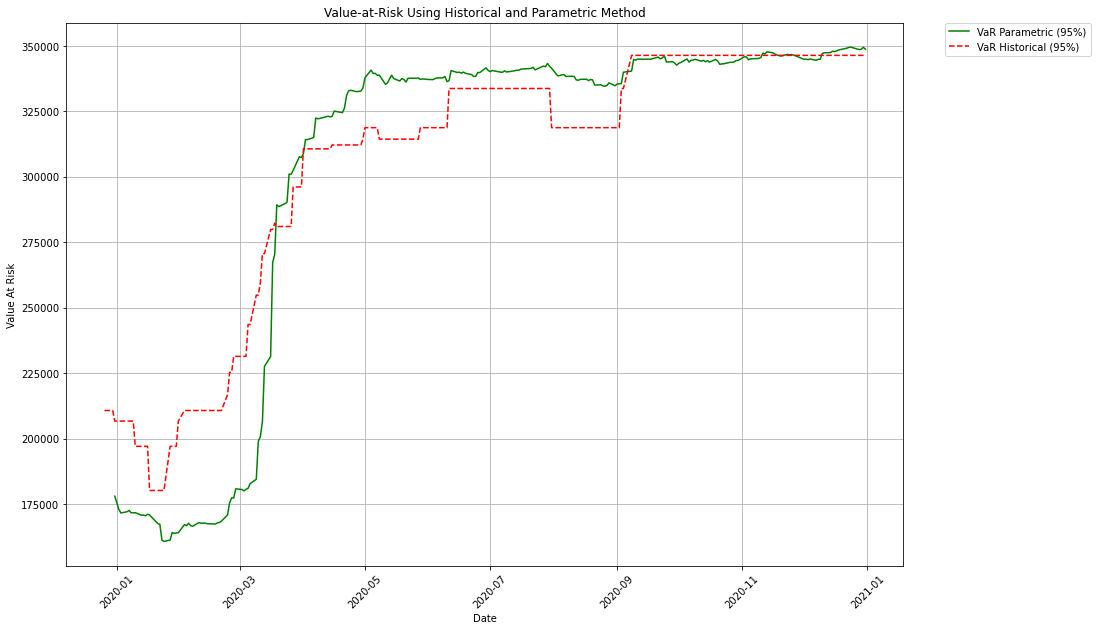

In [160]:
plt.figure(figsize=(15,10))
plt.plot(portfolio['Date'], -portfolio['Var_Para_95'], 'g-', label='VaR Parametric (95%)')
plt.plot(portfolio['Date'], -portfolio['Var_Hist_95'], 'r--', label='VaR Historical (95%)')

plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk Using Historical and Parametric Method')
plt.show()

# OPTIMAL PORTFOLIO VAR

In [161]:
print(portfolio.iloc[505]['Var_Para_95'])
print(portfolio.iloc[505]['Var_Hist_95'])
print(portfolio.iloc[505]['Date'])
print("\n")
print(portfolio.iloc[441]['Var_Para_95'])
print(portfolio.iloc[441]['Var_Hist_95'])
print(portfolio.iloc[441]['Date'])
print("\n")
print(portfolio.iloc[335]['Var_Para_95'])
print(portfolio.iloc[335]['Var_Hist_95'])
print(portfolio.iloc[335]['Date'])
print("\n")
print(portfolio.iloc[273]['Var_Para_95'])
print(portfolio.iloc[273]['Var_Hist_95'])
print(portfolio.iloc[273]['Date'])

-348711.69264616235
-346381.9923058342
2020-12-31 00:00:00


-342640.4424979432
-346381.9923058342
2020-09-30 00:00:00


-333864.0473481269
-314375.05360234575
2020-04-30 00:00:00


-164010.92630153798
-206664.89258522406
2020-01-31 00:00:00


## Expected Shortfall for Optimal Portfolio

In [162]:
portfolio

,NVDA_weight,NXPI_weight,MU_weight,MCHP_weight,LRCX_weight,ON_weight,ENPH_weight,AMAT_weight,AEIS_weight,MTSI_weight,...,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,ES_Hist_95,ES_Para_95,log_return_nextday
0,0.065193,0.139317,0.062284,0.136001,0.256031,0.032454,0.009298,0.062017,0.084121,0.028522,...,NaN,"[0.06519310916865576, 0.139316862796346, 0.062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,90245.561254
1,0.065600,0.140667,0.063396,0.133054,0.256433,0.032527,0.009537,0.062540,0.083767,0.028825,...,NaN,"[0.06559972016087319, 0.1406674998692862, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-398032.237882
2,0.065201,0.142734,0.063479,0.130826,0.258180,0.032091,0.009761,0.062324,0.083787,0.028995,...,NaN,"[0.06520088373953767, 0.14273371120396677, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,312033.301664
3,0.066020,0.142393,0.063719,0.129544,0.257686,0.032197,0.009913,0.063369,0.083622,0.028645,...,NaN,"[0.06602022673917737, 0.14239301028159637, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,174361.870799
4,0.067989,0.140300,0.064797,0.130408,0.254273,0.032444,0.010039,0.063081,0.083783,0.029047,...,NaN,"[0.0679889629398948, 0.14029999998816964, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-89327.458714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.084925,0.102043,0.046100,0.088714,0.312025,0.020924,0.118643,0.055508,0.064484,0.035693,...,"[[0.0013582756070600333, 0.000947983841149691,...","[0.08492523611392672, 0.10204304473289537, 0.0...","[0.003154709605840631, 0.0008599703554229809, ...",0.001359,0.002394,-349485.825597,-346381.992306,0.002533,0.005831,-25764.208822
502,0.084952,0.103366,0.046503,0.089047,0.311618,0.021056,0.115655,0.055628,0.064586,0.036063,...,"[[0.0013563012304458333, 0.0009474125813009326...","[0.08495240974172069, 0.10336645931877383, 0.0...","[0.0032275233478735368, 0.0008919583201948362,...",0.001356,0.002467,-348587.298990,-346381.992306,0.002637,0.006020,-118232.754393
503,0.086352,0.103223,0.046811,0.089491,0.313786,0.021138,0.113636,0.055957,0.063394,0.035386,...,"[[0.0013563712067727884, 0.0009473496973226858...","[0.08635245181066219, 0.10322262958879042, 0.0...","[0.0031475769390111267, 0.0009223625198750846,...",0.001354,0.002409,-348728.221682,-346381.992306,0.002594,0.005857,237038.751035
504,0.085741,0.103165,0.046878,0.088543,0.314044,0.021200,0.112875,0.056464,0.063231,0.035795,...,"[[0.0013553046302836602, 0.0009467374484644075...","[0.0857410417181478, 0.1031653847530689, 0.046...","[0.003083354364067464, 0.0008247653965430242, ...",0.001352,0.002240,-349489.413867,-346381.992306,0.002400,0.005470,29376.785495


In [163]:

ES_Hist_95 = []

alpha = 0.05
for index, row in portfolio.iterrows():
    if index < 252:

        ES_Hist_95.append(np.nan)
    else:
        sum_of_var = 0
        count = 0
        VaR = row['Var_Hist_95']
        log_returns_sorted = sorted(row['log_returns'])
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1
        
        try:
            sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
            ES_hist = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
            ES_Hist_95.append(ES_hist)
            
        except ZeroDivisionError as e1:
            sum_rt0 = sum(log_returns_sorted)
            print(sum_rt0)
            ES_hist = sum_rt0/10
            ES_Hist_95.append(ES_hist)
            
        

                
portfolio['ES_Hist_95'] = ES_Hist_95
portfolio

0.027072050145471475
0.029966145840435582
0.028716626510352096
0.02678152656524838
0.026616915853688878
0.025646318933622906
0.025160009715000084
0.024696319449887108
0.02559651031308921
0.025911816269083836
0.026062764627949733
0.024922256410518522
0.02482448409541546
0.026992366601649338
0.027350103429765526
0.02445772187620278
0.023238146529833276
0.023333009546405038
0.02151656642202098
0.021372579303179588
0.021173673722280635
0.020867298942034106
0.01808155060095894
0.01820715689965413
0.01909965310565358
0.020989576325302687
0.02087630037236038
0.0192596962596238
0.018832612883150333
0.01945374607039061
0.020124007458428527
0.020158551224503257
0.02022591939487811
0.01906382834053188
0.021606086586147447
0.020377838230288575
0.01823211265680248
0.015713455805060915
0.01418939809863511
0.014307541652047496
0.011192445497569333
0.012449161446685252
0.014517846712225661
0.014372155357296457
0.016873213063494513
0.015087488582807316
0.012297045797548475
0.0063976780817657465
0.00905

,NVDA_weight,NXPI_weight,MU_weight,MCHP_weight,LRCX_weight,ON_weight,ENPH_weight,AMAT_weight,AEIS_weight,MTSI_weight,...,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,ES_Hist_95,ES_Para_95,log_return_nextday
0,0.065193,0.139317,0.062284,0.136001,0.256031,0.032454,0.009298,0.062017,0.084121,0.028522,...,NaN,"[0.06519310916865576, 0.139316862796346, 0.062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,90245.561254
1,0.065600,0.140667,0.063396,0.133054,0.256433,0.032527,0.009537,0.062540,0.083767,0.028825,...,NaN,"[0.06559972016087319, 0.1406674998692862, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-398032.237882
2,0.065201,0.142734,0.063479,0.130826,0.258180,0.032091,0.009761,0.062324,0.083787,0.028995,...,NaN,"[0.06520088373953767, 0.14273371120396677, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,312033.301664
3,0.066020,0.142393,0.063719,0.129544,0.257686,0.032197,0.009913,0.063369,0.083622,0.028645,...,NaN,"[0.06602022673917737, 0.14239301028159637, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,174361.870799
4,0.067989,0.140300,0.064797,0.130408,0.254273,0.032444,0.010039,0.063081,0.083783,0.029047,...,NaN,"[0.0679889629398948, 0.14029999998816964, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-89327.458714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.084925,0.102043,0.046100,0.088714,0.312025,0.020924,0.118643,0.055508,0.064484,0.035693,...,"[[0.0013582756070600333, 0.000947983841149691,...","[0.08492523611392672, 0.10204304473289537, 0.0...","[0.003154709605840631, 0.0008599703554229809, ...",0.001359,0.002394,-349485.825597,-346381.992306,0.002533,0.005831,-25764.208822
502,0.084952,0.103366,0.046503,0.089047,0.311618,0.021056,0.115655,0.055628,0.064586,0.036063,...,"[[0.0013563012304458333, 0.0009474125813009326...","[0.08495240974172069, 0.10336645931877383, 0.0...","[0.0032275233478735368, 0.0008919583201948362,...",0.001356,0.002467,-348587.298990,-346381.992306,0.002637,0.006020,-118232.754393
503,0.086352,0.103223,0.046811,0.089491,0.313786,0.021138,0.113636,0.055957,0.063394,0.035386,...,"[[0.0013563712067727884, 0.0009473496973226858...","[0.08635245181066219, 0.10322262958879042, 0.0...","[0.0031475769390111267, 0.0009223625198750846,...",0.001354,0.002409,-348728.221682,-346381.992306,0.002594,0.005857,237038.751035
504,0.085741,0.103165,0.046878,0.088543,0.314044,0.021200,0.112875,0.056464,0.063231,0.035795,...,"[[0.0013553046302836602, 0.0009467374484644075...","[0.0857410417181478, 0.1031653847530689, 0.046...","[0.003083354364067464, 0.0008247653965430242, ...",0.001352,0.002240,-349489.413867,-346381.992306,0.002400,0.005470,29376.785495


In [164]:
ES_Para_95 = []

for index, row in portfolio.iterrows():
    if index < 252:
        ES_Para_95.append(np.nan)

    else:
        mu = np.mean(row['log_returns'])
        sigma = np.std(row['log_returns'])
        es_99 = mu+sigma*norm.pdf(norm.ppf(0.99, loc=0, scale=1), loc=0, scale=1)/(1-0.99)
        es_95 = mu+sigma*norm.pdf(norm.ppf(0.95, loc=0, scale=1), loc=0, scale=1)/(1-0.95)
        ES_Para_95.append(es_95)
        
#df = pd.DataFrame({99:ES_Para_99,95:ES_95})
    
portfolio['ES_Para_95'] = ES_Para_95
#df
portfolio

,NVDA_weight,NXPI_weight,MU_weight,MCHP_weight,LRCX_weight,ON_weight,ENPH_weight,AMAT_weight,AEIS_weight,MTSI_weight,...,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,ES_Hist_95,ES_Para_95,log_return_nextday
0,0.065193,0.139317,0.062284,0.136001,0.256031,0.032454,0.009298,0.062017,0.084121,0.028522,...,NaN,"[0.06519310916865576, 0.139316862796346, 0.062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,90245.561254
1,0.065600,0.140667,0.063396,0.133054,0.256433,0.032527,0.009537,0.062540,0.083767,0.028825,...,NaN,"[0.06559972016087319, 0.1406674998692862, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-398032.237882
2,0.065201,0.142734,0.063479,0.130826,0.258180,0.032091,0.009761,0.062324,0.083787,0.028995,...,NaN,"[0.06520088373953767, 0.14273371120396677, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,312033.301664
3,0.066020,0.142393,0.063719,0.129544,0.257686,0.032197,0.009913,0.063369,0.083622,0.028645,...,NaN,"[0.06602022673917737, 0.14239301028159637, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,174361.870799
4,0.067989,0.140300,0.064797,0.130408,0.254273,0.032444,0.010039,0.063081,0.083783,0.029047,...,NaN,"[0.0679889629398948, 0.14029999998816964, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-89327.458714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.084925,0.102043,0.046100,0.088714,0.312025,0.020924,0.118643,0.055508,0.064484,0.035693,...,"[[0.0013582756070600333, 0.000947983841149691,...","[0.08492523611392672, 0.10204304473289537, 0.0...","[0.003154709605840631, 0.0008599703554229809, ...",0.001359,0.002394,-349485.825597,-346381.992306,0.002533,0.005831,-25764.208822
502,0.084952,0.103366,0.046503,0.089047,0.311618,0.021056,0.115655,0.055628,0.064586,0.036063,...,"[[0.0013563012304458333, 0.0009474125813009326...","[0.08495240974172069, 0.10336645931877383, 0.0...","[0.0032275233478735368, 0.0008919583201948362,...",0.001356,0.002467,-348587.298990,-346381.992306,0.002637,0.006020,-118232.754393
503,0.086352,0.103223,0.046811,0.089491,0.313786,0.021138,0.113636,0.055957,0.063394,0.035386,...,"[[0.0013563712067727884, 0.0009473496973226858...","[0.08635245181066219, 0.10322262958879042, 0.0...","[0.0031475769390111267, 0.0009223625198750846,...",0.001354,0.002409,-348728.221682,-346381.992306,0.002594,0.005857,237038.751035
504,0.085741,0.103165,0.046878,0.088543,0.314044,0.021200,0.112875,0.056464,0.063231,0.035795,...,"[[0.0013553046302836602, 0.0009467374484644075...","[0.0857410417181478, 0.1031653847530689, 0.046...","[0.003083354364067464, 0.0008247653965430242, ...",0.001352,0.002240,-349489.413867,-346381.992306,0.002400,0.005470,29376.785495


# OPTIMAL PORTFOLIO ES

In [165]:
print(portfolio.iloc[505]['ES_Para_95'])
print(portfolio.iloc[505]['ES_Hist_95'])
print(portfolio.iloc[505]['Date'])
print("\n")
print(portfolio.iloc[441]['ES_Para_95'])
print(portfolio.iloc[441]['ES_Hist_95'])
print(portfolio.iloc[441]['Date'])
print("\n")
print(portfolio.iloc[335]['ES_Para_95'])
print(portfolio.iloc[335]['ES_Hist_95'])
print(portfolio.iloc[335]['Date'])
print("\n")
print(portfolio.iloc[273]['ES_Para_95'])
print(portfolio.iloc[273]['ES_Hist_95'])
print(portfolio.iloc[273]['Date'])

0.005595890570087501
0.002590917831626548
2020-12-31 00:00:00


0.004781089328535471
0.0018347095799150278
2020-09-30 00:00:00


0.004535753125986868
0.0010406892306119085
2020-04-30 00:00:00


0.004899585320322182
0.002086729894203411
2020-01-31 00:00:00


In [166]:
df["log_return_nextday"] = df["log_returns"].shift(-1)
portfolio['log_return_nextday'] = df['log_return_nextday']

In [167]:
log_returns_2020 = portfolio[253:]['log_return_nextday']
date_2020 = portfolio[253:]['Date']
date_2020

lg_returns = pd.DataFrame({'returns':log_returns_2020,'date':date_2020})
lg_returns

,returns,date
253,-98612.578726,2020-01-02
254,-113297.334558,2020-01-03
255,158793.784097,2020-01-06
256,31755.225191,2020-01-07
257,-29566.299342,2020-01-08
...,...,...
501,-25764.208822,2020-12-24
502,-118232.754393,2020-12-28
503,237038.751035,2020-12-29
504,29376.785495,2020-12-30


In [168]:
portfolio

,NVDA_weight,NXPI_weight,MU_weight,MCHP_weight,LRCX_weight,ON_weight,ENPH_weight,AMAT_weight,AEIS_weight,MTSI_weight,...,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,ES_Hist_95,ES_Para_95,log_return_nextday
0,0.065193,0.139317,0.062284,0.136001,0.256031,0.032454,0.009298,0.062017,0.084121,0.028522,...,NaN,"[0.06519310916865576, 0.139316862796346, 0.062...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,90245.561254
1,0.065600,0.140667,0.063396,0.133054,0.256433,0.032527,0.009537,0.062540,0.083767,0.028825,...,NaN,"[0.06559972016087319, 0.1406674998692862, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-398032.237882
2,0.065201,0.142734,0.063479,0.130826,0.258180,0.032091,0.009761,0.062324,0.083787,0.028995,...,NaN,"[0.06520088373953767, 0.14273371120396677, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,312033.301664
3,0.066020,0.142393,0.063719,0.129544,0.257686,0.032197,0.009913,0.063369,0.083622,0.028645,...,NaN,"[0.06602022673917737, 0.14239301028159637, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,174361.870799
4,0.067989,0.140300,0.064797,0.130408,0.254273,0.032444,0.010039,0.063081,0.083783,0.029047,...,NaN,"[0.0679889629398948, 0.14029999998816964, 0.06...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,-89327.458714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.084925,0.102043,0.046100,0.088714,0.312025,0.020924,0.118643,0.055508,0.064484,0.035693,...,"[[0.0013582756070600333, 0.000947983841149691,...","[0.08492523611392672, 0.10204304473289537, 0.0...","[0.003154709605840631, 0.0008599703554229809, ...",0.001359,0.002394,-349485.825597,-346381.992306,0.002533,0.005831,-25764.208822
502,0.084952,0.103366,0.046503,0.089047,0.311618,0.021056,0.115655,0.055628,0.064586,0.036063,...,"[[0.0013563012304458333, 0.0009474125813009326...","[0.08495240974172069, 0.10336645931877383, 0.0...","[0.0032275233478735368, 0.0008919583201948362,...",0.001356,0.002467,-348587.298990,-346381.992306,0.002637,0.006020,-118232.754393
503,0.086352,0.103223,0.046811,0.089491,0.313786,0.021138,0.113636,0.055957,0.063394,0.035386,...,"[[0.0013563712067727884, 0.0009473496973226858...","[0.08635245181066219, 0.10322262958879042, 0.0...","[0.0031475769390111267, 0.0009223625198750846,...",0.001354,0.002409,-348728.221682,-346381.992306,0.002594,0.005857,237038.751035
504,0.085741,0.103165,0.046878,0.088543,0.314044,0.021200,0.112875,0.056464,0.063231,0.035795,...,"[[0.0013553046302836602, 0.0009467374484644075...","[0.0857410417181478, 0.1031653847530689, 0.046...","[0.003083354364067464, 0.0008247653965430242, ...",0.001352,0.002240,-349489.413867,-346381.992306,0.002400,0.005470,29376.785495


In [169]:
portfolio_bt = deepcopy(portfolio)
portfolio_bt = portfolio_bt[253:]
portfolio_bt

exception_parametric_date = portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']]['Date']
exception_historical_date = portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']]['Date']

In [170]:
print(f'There are {len(exception_parametric_date)} days where losses exceed VaR using parametric')
print(f'There are {len(exception_historical_date)} days where losses exceed VaR using historical')

There are 23 days where losses exceed VaR using parametric
There are 20 days where losses exceed VaR using historical


In [171]:
observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05


print("VaR 95% Historical Method") 
print("VaR level: %s" %(0.95))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

VaR 95% Historical Method
VaR level: 0.95
Observed level: 0.9209486166007905
Observations: 253
Failures: 20
Expected: 12.65


In [172]:
#Parametric

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05


print("VaR 95% Parametric Method") 
print("VaR level: %s" %(0.99))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

VaR 95% Parametric Method
VaR level: 0.99
Observed level: 0.9090909090909091
Observations: 253
Failures: 23
Expected: 12.65


In [173]:
from scipy.stats import binom

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_95 = 1-binom.cdf(failures, observations, 0.05)
print("P-value of VaR 95%: ", p_value_95)
if(p_value_95 < backtesting_alpha):
    print("Reject null hypothesis under binomial distribution, using parametric method")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution, using parametric method")

P-value of VaR 95%:  0.0021850640953736677
Reject null hypothesis under binomial distribution, using parametric method


In [174]:
from scipy.stats import binom

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_95 = 1-binom.cdf(failures, observations, 0.05)
print("P-value of VaR 95%: ", p_value_95)
if(p_value_95 < backtesting_alpha):
    print("Reject null hypothesis under binomial distribution, using parametric method")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution, using parametric method")

P-value of VaR 95%:  0.01675977383821814
Reject null hypothesis under binomial distribution, using parametric method


In [175]:
# Calculate p value for 99% VaR based on normal distribution
#Parametric
# Calculate p value for 95% VaR based on normal distribution


from scipy.stats import norm

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected

z_score = (failures-expected)/sqrt(expected*0.95)
p_VaR_95 = 1-norm.cdf(z_score, 0, 1)
print("z score: ", z_score)
print("P-value of VaR 95%: ", p_VaR_95)
if(p_VaR_95 < backtesting_alpha):
    print("Reject null hypothesis using parametric method")
else:
    print(f"Not enough evidence to reject null {backtesting_alpha} backtesting significance level under normal distribution using parametric method ")

z score:  2.98561142784625
P-value of VaR 95%:  0.0014150600430984372
Reject null hypothesis using parametric method


In [176]:
#Historical
from scipy.stats import norm

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected

z_score = (failures-expected)/sqrt(expected*0.95)
p_VaR_99 = 1-norm.cdf(z_score, 0, 1)
print("z score: ", z_score)
print("P-value of VaR 99%: ", p_VaR_95)
if(p_VaR_95 < backtesting_alpha):
    print("Reject null hypothesis using parametric method")
else:
    print(f"Not enough evidence to reject null {backtesting_alpha} backtesting significance level under normal distribution using parametric method ")

z score:  2.120216811079221
P-value of VaR 99%:  0.0014150600430984372
Reject null hypothesis using parametric method


In [177]:
#Historical
from copy import deepcopy
df_95 = deepcopy(portfolio_bt)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_95['ind_t'] = df_95.apply(lambda row: 1 if row['Var_Hist_95']>row['log_return_nextday'] else 0, axis=1)
df_95['ind_t1'] = df_95['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_95['ind_00'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_10'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_95['ind_01'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_11'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_95.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures


N00, N10, N01, N11 = df_95[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1


In [178]:
N00, N10, N01, N11


(215, 16, 16, 4)

In [179]:
#Historical
from copy import deepcopy
df_95 = deepcopy(portfolio_bt)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_95['ind_t'] = df_95.apply(lambda row: 1 if row['Var_Para_95']>row['log_return_nextday'] else 0, axis=1)
df_95['ind_t1'] = df_95['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_95['ind_00'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_10'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_95['ind_01'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_11'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_95.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures


N00, N10, N01, N11 = df_95[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1


In [180]:
N00, N10, N01, N11

(212, 16, 16, 7)